<h3>PBI Rakamin Academy: [Final Task] Home Credit Scorecard Model

<b>Project Background:

Home Credit adalah perusahaan pembiayaan konsumen yang menyediakan berbagai produk dan layanan keuangan, termasuk pinjaman pribadi, kredit ritel, dan kartu kredit. Perusahaan berkomitmen untuk memperluas inklusi keuangan dengan memberikan pengalaman peminjaman yang positif dan aman.

Home Credit memiliki tujuan untuk memprediksi kemampuan setiap pemohon pinjaman dalam membayar kembali pinjamannya. Dengan memanfaatkan berbagai data alternatif, Home Credit menggunakan analisis prediktif untuk menilai potensi pembayaran klien. Pendekatan ini bertujuan agar nasabah yang mampu membayar tidak ditolak, sementara pinjaman diberikan dengan prinsipal, jangka waktu, dan jadwal pembayaran yang memberdayakan nasabah menuju kesuksesan finansial. Dengan demikian, Home Credit tidak hanya mengurangi risiko kerugian, tetapi juga menciptakan pengalaman peminjaman yang positif untuk semua pelanggannya.

<b>1. Tahap Persiapan

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Data Mining/Home-Credit-Scorecard-Model/application_train.csv')

<b>Gathering data

In [ ]:
##jumlah kolom dan baris
print(train_df.shape)


(307511, 122)


In [ ]:
train_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Berdasarkan informasi diatas, terdapat 307511 baris data dan 122 kolom.

Seorang konsumer mengalami kesulitan untuk membayar cicilan kredit berarti mengalami keterlambatan pembayaran

<b>Exploratory Data Analysis (EDA)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


<b>Visualisasi

In [ ]:
# Dictionary yang digunakan untuk mendecode nilai dalam kolom 'TARGET'
decode = {0: "No Payment Difficulties", 1: "Payment Difficulties"}

# Fungsi untuk mendecode nilai dalam kolom 'TARGET' berdasarkan dictionary decode
def decode_target(x):
    return decode.get(x, "Unknown")  # Menggunakan get() untuk menangani nilai nan dengan mengembalikan "Unknown"

train= train_df.copy()
train['TARGET'] = train['TARGET'].apply(lambda x: decode_target(x))



In [ ]:
##  DataFrame yang berisi jumlah data untuk setiap nilai dalam kolom 'TARGET'
target_df =(train[['TARGET']]
                .groupby("TARGET")
                .agg(COUNT=("TARGET","count"))
                .sort_values(by=["COUNT"],ascending=False)
                .reset_index()
                )

target_df

,TARGET,COUNT
0,No Payment Difficulties,282686
1,Payment Difficulties,24825


In [ ]:
# ubah ke persen
target_df['PERCENTAGE'] = target_df['COUNT'].apply(lambda x: x/target_df['COUNT'].sum()*100)
target_df

,TARGET,COUNT,PERCENTAGE
0,No Payment Difficulties,282686,91.927118
1,Payment Difficulties,24825,8.072882


<ipython-input-16-54847d4cbb40>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="TARGET", data=train, palette="Set1")


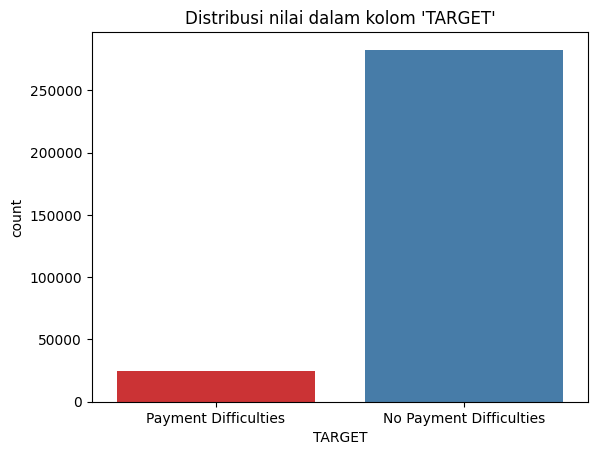

In [ ]:
# tampilkan distribusi nilai dalam kolom 'TARGET' pada DataFrame train menggunakan bar plot dan bedakan warnanya
sns.countplot(x="TARGET", data=train, palette="Set1")
plt.title("Distribusi nilai dalam kolom 'TARGET'")
plt.show()

Dari data pinjaman yang ada, sebanyak 282,686 pinjaman atau 91.9% memiliki nilai TARGET = 0, menunjukkan bahwa mayoritas klien berhasil melunasi pinjaman tepat waktu tanpa kendala. Sebaliknya, sekitar 24,825 pinjaman atau 8% memiliki nilai TARGET = 1, menandakan bahwa sebagian kecil klien menghadapi kesulitan dalam membayar kembali pinjaman mereka.

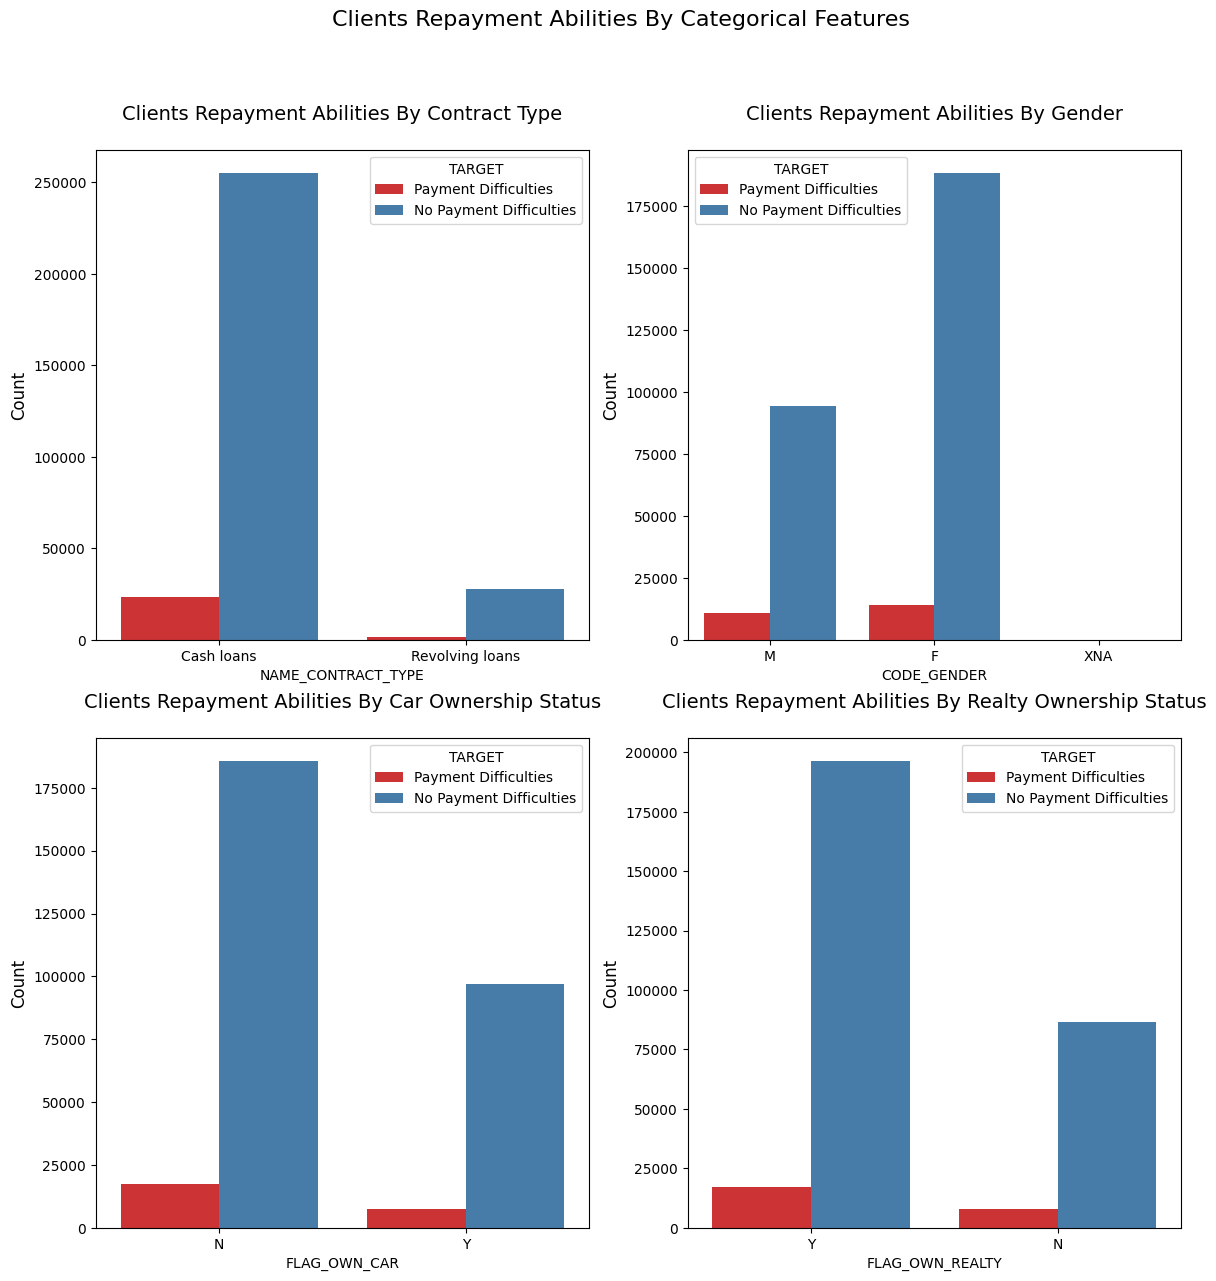

In [ ]:
# visualisasi Contract Type, Gender, Car Ownership Status, and Realty Ownership Status
fig, ax = plt.subplots(2, 2, figsize=(14, 14))
fig.suptitle('Clients Repayment Abilities By Categorical Features', fontsize=16)

sns.countplot(x="NAME_CONTRACT_TYPE", hue="TARGET", data=train, palette="Set1", ax=ax[0, 0])
ax[0, 0].set_title("Clients Repayment Abilities By Contract Type\n", fontsize=14)
ax[0, 0].set_ylabel("Count", fontsize=12)


sns.countplot(x="CODE_GENDER", hue="TARGET", data=train, palette="Set1", ax=ax[0, 1])
ax[0, 1].set_title("Clients Repayment Abilities By Gender\n", fontsize=14)
ax[0,1].set_ylabel("Count", fontsize=12)


sns.countplot(x="FLAG_OWN_CAR", hue="TARGET", data=train, palette="Set1", ax=ax[1, 0])
ax[1,0].set_title("Clients Repayment Abilities By Car Ownership Status\n", fontsize=14)
ax[1,0].set_ylabel("Count", fontsize=12)

sns.countplot(x="FLAG_OWN_REALTY", hue="TARGET", data=train, palette="Set1", ax=ax[1, 1])
ax[1,1].set_title("Clients Repayment Abilities By Realty Ownership Status\n", fontsize=14)
ax[1,1].set_ylabel("Count", fontsize=12)

plt.show()




Contract Type Vs Target

In [ ]:
#Contract Type Vs Target
contract_type=train.groupby(by=['NAME_CONTRACT_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
contract_type.rename(columns={'SK_ID_CURR':'COUNT'}, inplace=True)
contract_type


,NAME_CONTRACT_TYPE,TARGET,COUNT
0,Cash loans,No Payment Difficulties,255011
1,Cash loans,Payment Difficulties,23221
2,Revolving loans,No Payment Difficulties,27675
3,Revolving loans,Payment Difficulties,1604


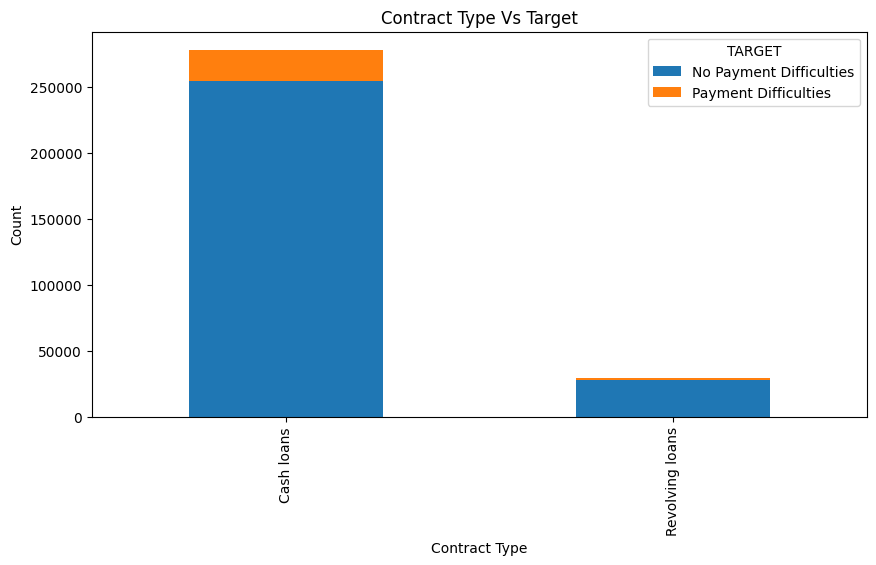

In [ ]:
# visualisasikan
contract_type=contract_type.pivot(index='NAME_CONTRACT_TYPE', columns='TARGET', values='COUNT')
contract_type.plot(kind='bar', stacked=True, figsize=(10,5))
plt.title('Contract Type Vs Target')
plt.ylabel('Count')
plt.xlabel('Contract Type')
plt.show()


<small>Sebanyak 278 ribu pinjaman tunai mendominasi jumlah total pinjaman dalam dataset ini. Sementara itu, pinjaman bergulir memiliki jumlah yang jauh lebih rendah, sekitar 29 ribu, dibandingkan dengan pinjaman tunai

In [ ]:
# Gender Vs Target
train['CODE_GENDER'] = train['CODE_GENDER'].replace(['F','M'],['Female','Male'])
gender_target=train.groupby(by=['CODE_GENDER','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Gender')
gender_target.rename(columns={'SK_ID_CURR':'COUNT'}, inplace=True)
gender_target

Clients Repayment Abilities By Gender


,CODE_GENDER,TARGET,COUNT
0,Female,No Payment Difficulties,188278
1,Female,Payment Difficulties,14170
2,Male,No Payment Difficulties,94404
3,Male,Payment Difficulties,10655
4,XNA,No Payment Difficulties,4


In [ ]:
train_df[['CODE_GENDER', 'TARGET']].groupby(['CODE_GENDER'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,CODE_GENDER,TARGET
1,M,0.101419
0,F,0.069993
2,XNA,0.000000


<small>Wanita mendominasi pengajuan pinjaman dengan sekitar 202.448 aplikasi, sedangkan pria mengajukan sekitar 105.059 aplikasi. Meskipun persentase masalah pembayaran pinjaman lebih kecil secara keseluruhan (7% untuk wanita dan 10% untuk pria), pria menghadapi lebih banyak tantangan dalam pembayaran pinjaman

In [ ]:
#Car Ownership Status Vs Target
car_ownership=train.groupby(by=['FLAG_OWN_CAR','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Car Ownership Status')
car_ownership.rename(columns={'SK_ID_CURR':'COUNT'}, inplace=True)
car_ownership


Clients Repayment Abilities By Car Ownership Status


,FLAG_OWN_CAR,TARGET,COUNT
0,N,No Payment Difficulties,185675
1,N,Payment Difficulties,17249
2,Y,No Payment Difficulties,97011
3,Y,Payment Difficulties,7576


In [ ]:
train_df[['FLAG_OWN_CAR','TARGET']].groupby(['FLAG_OWN_CAR'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,FLAG_OWN_CAR,TARGET
0,N,0.085002
1,Y,0.072437


<small>Mayoritas nasabah tidak memiliki mobil. Meskipun nasabah dengan mobil (sekitar 8%) mengalami sedikit lebih banyak masalah pembayaran (7% untuk yang tanpa mobil), perbedaannya tidak signifikan

Realty Ownership Status Vs Target

In [ ]:
#Realty Ownership Status Vs Target
train['FLAG_OWN_REALTY'] = train['FLAG_OWN_REALTY'].replace(['Y','N'],['Yes','No'])
realty_ownership=train.groupby(by=['FLAG_OWN_REALTY','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Realty Ownership Status')
realty_ownership.rename(columns={'SK_ID_CURR':'COUNT'}, inplace=True)
realty_ownership


Clients Repayment Abilities By Realty Ownership Status


,FLAG_OWN_REALTY,TARGET,COUNT
0,No,No Payment Difficulties,86357
1,No,Payment Difficulties,7842
2,Yes,No Payment Difficulties,196329
3,Yes,Payment Difficulties,16983


In [ ]:
train_df[['FLAG_OWN_REALTY','TARGET']].groupby(['FLAG_OWN_REALTY'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)


,FLAG_OWN_REALTY,TARGET
0,N,0.083249
1,Y,0.079616


<small>Mayoritas klien memiliki flat atau rumah. Nasabah yang memiliki rumah atau rusun (sekitar 8%) mengalami sedikit lebih banyak masalah pembayaran dibandingkan dengan yang tidak memiliki (sekitar 7%), namun perbedaannya tidak terlalu signifikan

Suite Type, Income Type, Education Type, and Family Status

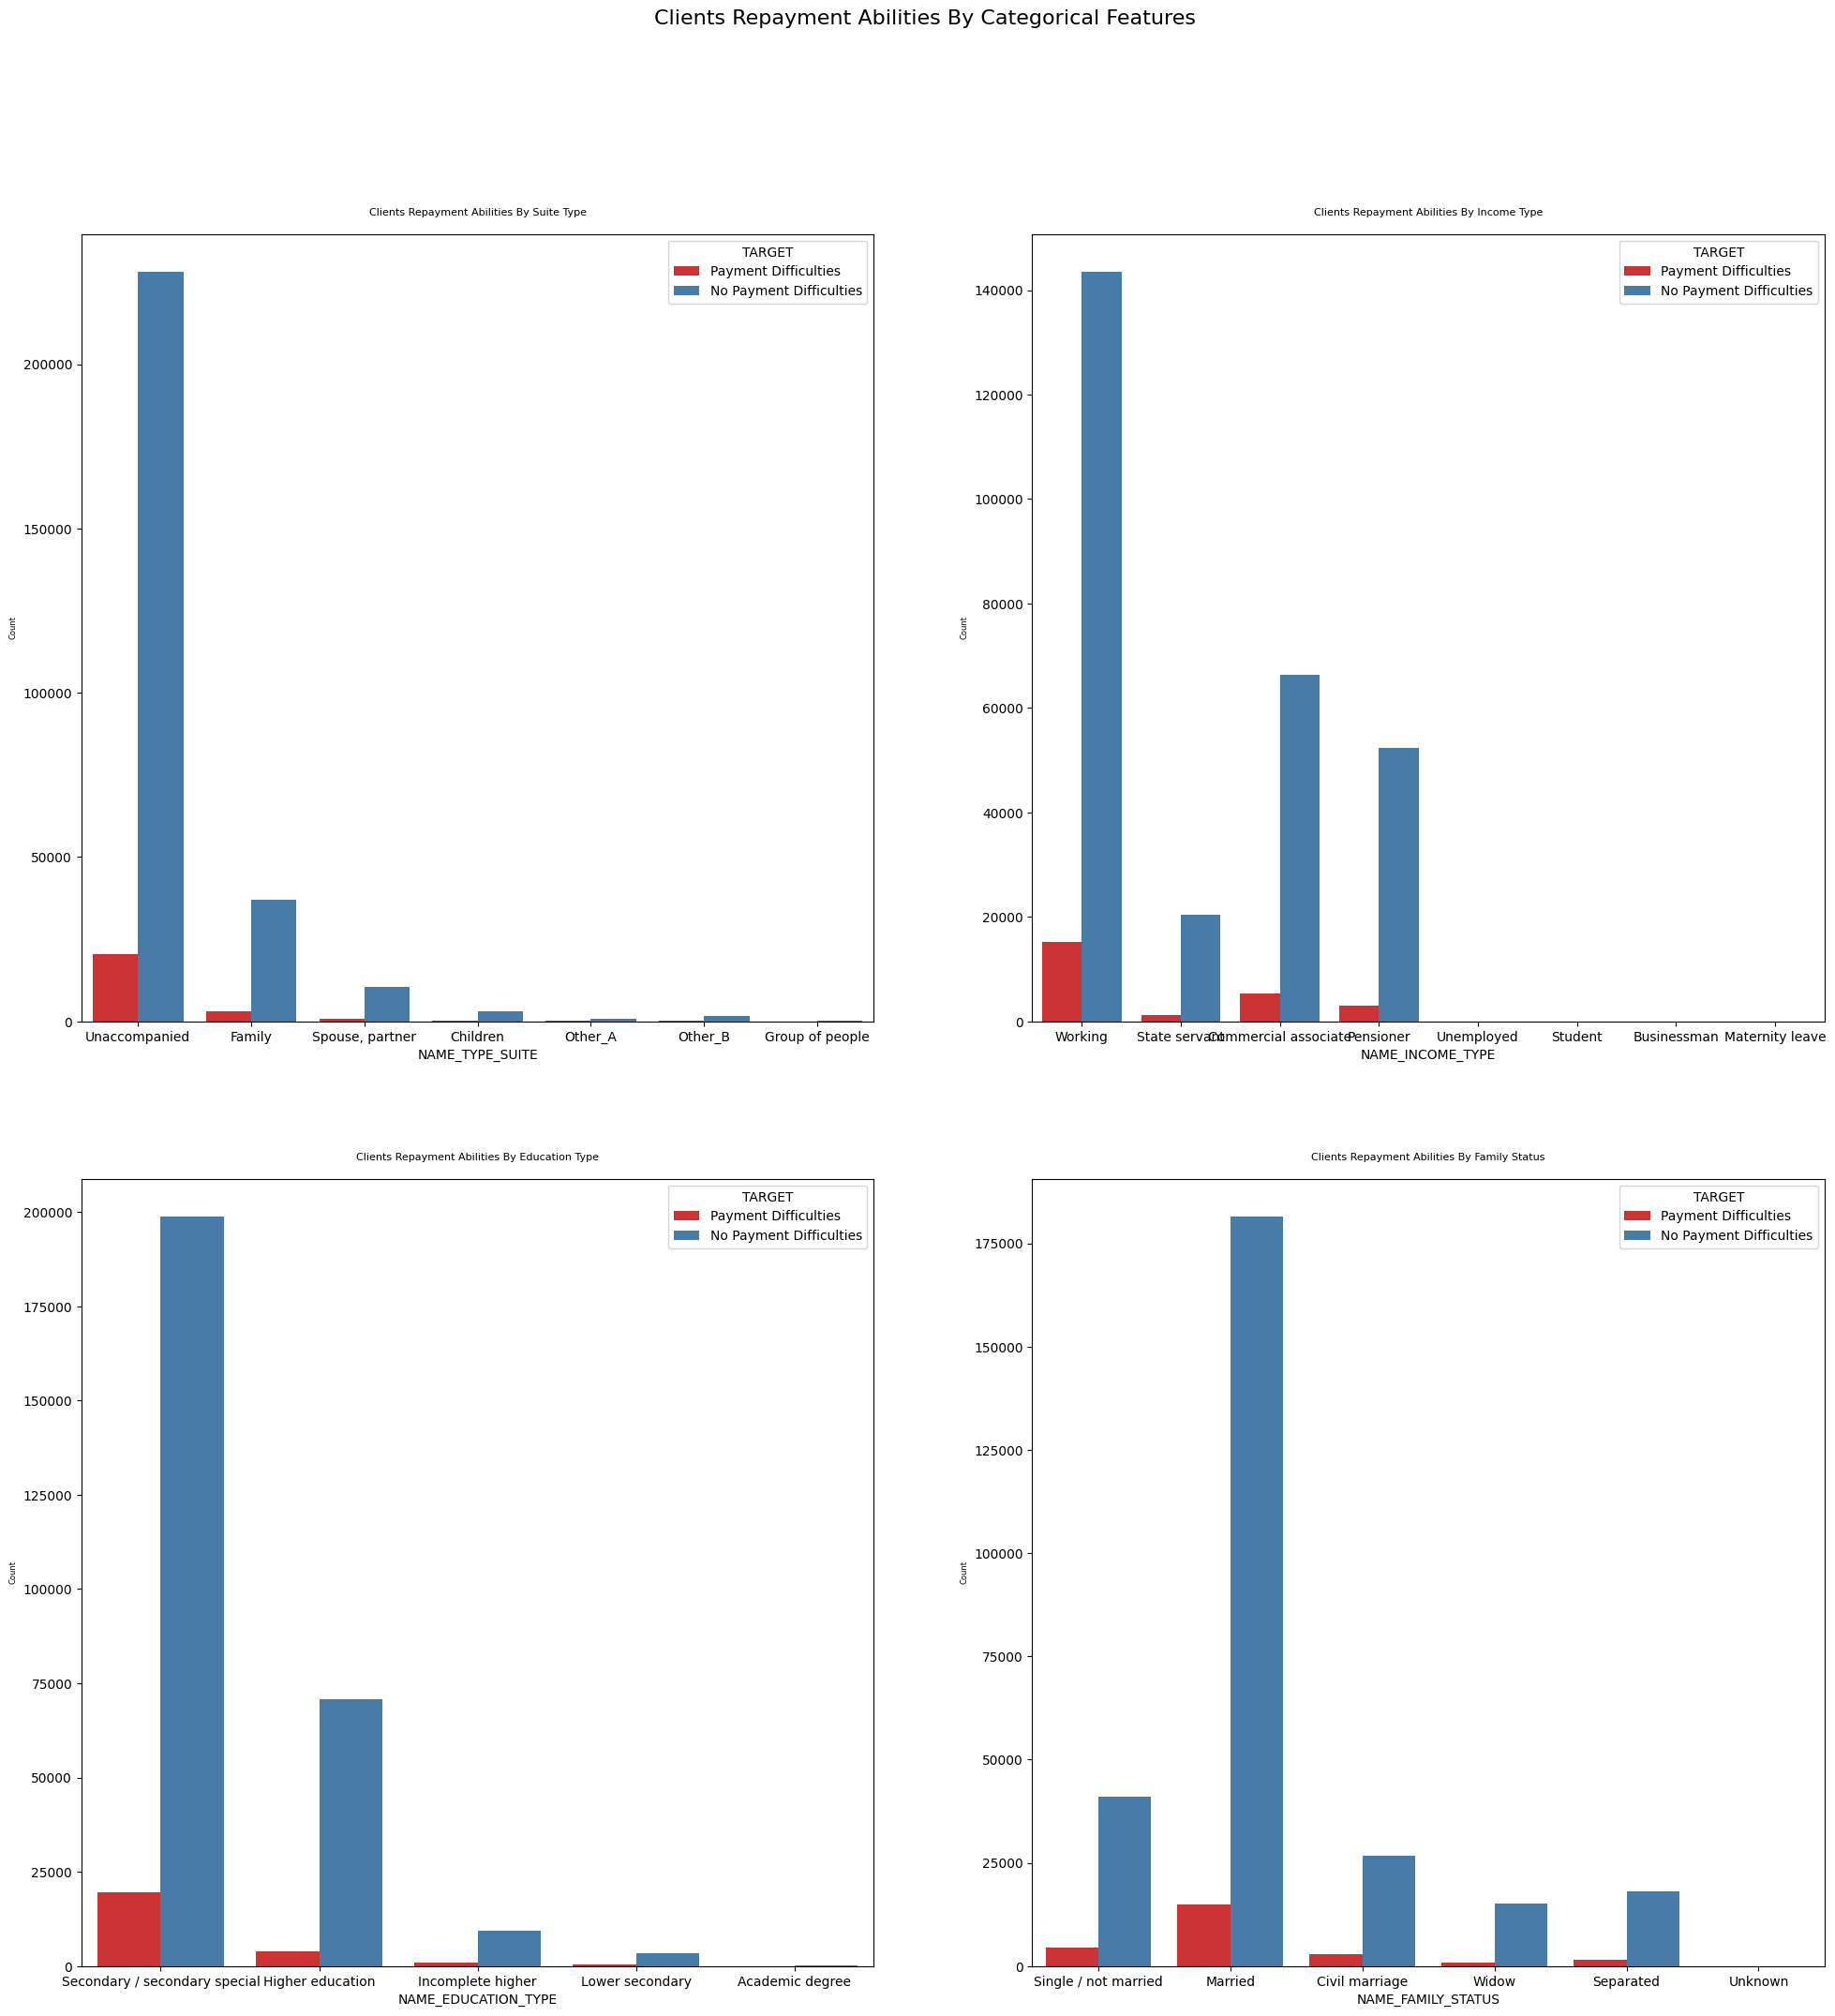

In [ ]:
# Suite Type, Income Type, Education Type, and Family Status
fig, ax = plt.subplots(2, 2, figsize=(24, 24))
fig.suptitle('Clients Repayment Abilities By Categorical Features', fontsize=16)

sns.countplot(x="NAME_TYPE_SUITE", hue="TARGET", data=train, palette="Set1", ax=ax[0, 0])
ax[0, 0].set_title("Clients Repayment Abilities By Suite Type\n", fontsize=8)
ax[0, 0].set_ylabel("Count", fontsize=6)


sns.countplot(x="NAME_INCOME_TYPE", hue="TARGET", data=train, palette="Set1", ax=ax[0, 1])
ax[0, 1].set_title("Clients Repayment Abilities By Income Type\n", fontsize=8)
ax[0,1].set_ylabel("Count", fontsize=6)


sns.countplot(x="NAME_EDUCATION_TYPE", hue="TARGET", data=train, palette="Set1", ax=ax[1, 0])
ax[1,0].set_title("Clients Repayment Abilities By Education Type\n", fontsize=8)
ax[1,0].set_ylabel("Count", fontsize=6)


sns.countplot(x="NAME_FAMILY_STATUS", hue="TARGET", data=train, palette="Set1", ax=ax[1, 1])
ax[1,1].set_title("Clients Repayment Abilities By Family Status\n", fontsize=8)
ax[1,1].set_ylabel("Count", fontsize=6)

plt.show()

Suite Type Vs Target

In [ ]:
# Suite Type Vs Target
suite_type=train.groupby(by=['NAME_TYPE_SUITE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Suite Type')
suite_type.rename(columns={'SK_ID_CURR':'COUNT'}, inplace=True)
suite_type


Clients Repayment Abilities By Suite Type


,NAME_TYPE_SUITE,TARGET,COUNT
0,Children,No Payment Difficulties,3026
1,Children,Payment Difficulties,241
2,Family,No Payment Difficulties,37140
3,Family,Payment Difficulties,3009
4,Group of people,No Payment Difficulties,248
5,Group of people,Payment Difficulties,23
6,Other_A,No Payment Difficulties,790
7,Other_A,Payment Difficulties,76
8,Other_B,No Payment Difficulties,1596
9,Other_B,Payment Difficulties,174


In [ ]:
train_df[['NAME_TYPE_SUITE','TARGET']].groupby(['NAME_TYPE_SUITE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)


,NAME_TYPE_SUITE,TARGET
4,Other_B,0.098305
3,Other_A,0.087760
2,Group of people,0.084871
6,Unaccompanied,0.081830
5,"Spouse, partner",0.078716
1,Family,0.074946
0,Children,0.073768


<small>Klien yang didampingi orang lain saat mengajukan pinjaman memiliki persentase kesulitan membayar kembali pinjaman yang lebih tinggi (sekitar 10%).

Income Type Vs Target

In [ ]:
# Income Type Vs Target
income_type=train.groupby(by=['NAME_INCOME_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Income Type')
income_type.rename(columns={'SK_ID_CURR':'COUNT'}, inplace=True)
income_type

Clients Repayment Abilities By Income Type


,NAME_INCOME_TYPE,TARGET,COUNT
0,Businessman,No Payment Difficulties,10
1,Commercial associate,No Payment Difficulties,66257
2,Commercial associate,Payment Difficulties,5360
3,Maternity leave,No Payment Difficulties,3
4,Maternity leave,Payment Difficulties,2
5,Pensioner,No Payment Difficulties,52380
6,Pensioner,Payment Difficulties,2982
7,State servant,No Payment Difficulties,20454
8,State servant,Payment Difficulties,1249
9,Student,No Payment Difficulties,18


In [ ]:
train_df[['NAME_INCOME_TYPE','TARGET']].groupby(['NAME_INCOME_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_INCOME_TYPE,TARGET
2,Maternity leave,0.400000
6,Unemployed,0.363636
7,Working,0.095885
1,Commercial associate,0.074843
4,State servant,0.057550
3,Pensioner,0.053864
0,Businessman,0.000000
5,Student,0.000000


<small>"Klien dengan jenis penghasilan dari pekerjaan mengajukan sebagian besar pinjaman, sekitar 158.774 aplikasi. Klien dengan jenis penghasilan sebagai pengusaha dan mahasiswa tidak mengalami kesulitan dalam pembayaran pinjaman. Sementara itu, klien dengan jenis penghasilan cuti melahirkan dan pengangguran memiliki persentase tertinggi (sekitar 40% dan 36%) pada TARGET = 1, yaitu mengalami kesulitan dalam pembayaran pinjaman."

Education Type Vs Target

In [ ]:
# Education Type Vs Target
education_type=train.groupby(by=['NAME_EDUCATION_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Education Type')
education_type.rename(columns={'SK_ID_CURR':'COUNT'}, inplace=True)
education_type


Clients Repayment Abilities By Education Type


,NAME_EDUCATION_TYPE,TARGET,COUNT
0,Academic degree,No Payment Difficulties,161
1,Academic degree,Payment Difficulties,3
2,Higher education,No Payment Difficulties,70854
3,Higher education,Payment Difficulties,4009
4,Incomplete higher,No Payment Difficulties,9405
5,Incomplete higher,Payment Difficulties,872
6,Lower secondary,No Payment Difficulties,3399
7,Lower secondary,Payment Difficulties,417
8,Secondary / secondary special,No Payment Difficulties,198867
9,Secondary / secondary special,Payment Difficulties,19524


In [ ]:
train_df[['NAME_EDUCATION_TYPE','TARGET']].groupby(['NAME_EDUCATION_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_EDUCATION_TYPE,TARGET
3,Lower secondary,0.109277
4,Secondary / secondary special,0.089399
2,Incomplete higher,0.084850
1,Higher education,0.053551
0,Academic degree,0.018293


<small>Banyak aplikasi (218 ribu) diajukan oleh klien berpendidikan menengah, diikuti oleh mereka dengan pendidikan tinggi sebanyak 75 ribu aplikasi. Sementara itu, klien berpendidikan menengah rendah memiliki persentase tertinggi (sekitar 10%) pada TARGET = 1, artinya mengalami kesulitan dalam pembayaran pinjaman

Family Status Vs Target

In [ ]:
# Family Status Vs Target
family_status=train.groupby(by=['NAME_FAMILY_STATUS','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Family Status')
family_status.rename(columns={'SK_ID_CURR':'COUNT'}, inplace=True)
family_status

Clients Repayment Abilities By Family Status


,NAME_FAMILY_STATUS,TARGET,COUNT
0,Civil marriage,No Payment Difficulties,26814
1,Civil marriage,Payment Difficulties,2961
2,Married,No Payment Difficulties,181582
3,Married,Payment Difficulties,14850
4,Separated,No Payment Difficulties,18150
5,Separated,Payment Difficulties,1620
6,Single / not married,No Payment Difficulties,40987
7,Single / not married,Payment Difficulties,4457
8,Unknown,No Payment Difficulties,2
9,Widow,No Payment Difficulties,15151


In [ ]:
train_df[['NAME_FAMILY_STATUS','TARGET']].groupby(['NAME_FAMILY_STATUS'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_FAMILY_STATUS,TARGET
0,Civil marriage,0.099446
3,Single / not married,0.098077
2,Separated,0.081942
1,Married,0.075599
5,Widow,0.058242
4,Unknown,0.000000


<small>"Klien yang berstatus menikah mengajukan sebagian besar pinjaman, sekitar 196.432 aplikasi. Klien dengan status pernikahan sipil dan single memiliki persentase tertinggi (sekitar 9%) pada kategori yang mengalami masalah dalam pembayaran pinjaman

<b>Housing Type, Occupation Type, Process Day, and Organization Type

Housing Type Vs Target

In [ ]:
# Housing Type Vs Target
housing_type=train.groupby(by=['NAME_HOUSING_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Housing Type')
housing_type.rename(columns={'SK_ID_CURR':'COUNT'}, inplace=True)
housing_type

Clients Repayment Abilities By Housing Type


,NAME_HOUSING_TYPE,TARGET,COUNT
0,Co-op apartment,No Payment Difficulties,1033
1,Co-op apartment,Payment Difficulties,89
2,House / apartment,No Payment Difficulties,251596
3,House / apartment,Payment Difficulties,21272
4,Municipal apartment,No Payment Difficulties,10228
5,Municipal apartment,Payment Difficulties,955
6,Office apartment,No Payment Difficulties,2445
7,Office apartment,Payment Difficulties,172
8,Rented apartment,No Payment Difficulties,4280
9,Rented apartment,Payment Difficulties,601


In [ ]:
train_df[['NAME_HOUSING_TYPE','TARGET']].groupby(['NAME_HOUSING_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_HOUSING_TYPE,TARGET
4,Rented apartment,0.123131
5,With parents,0.116981
2,Municipal apartment,0.085397
0,Co-op apartment,0.079323
1,House / apartment,0.077957
3,Office apartment,0.065724


<small>Dapat dilihat bahwa nasabah dengan tipe perumahan apartemen sewaan mempunyai persentase tertinggi (sekitar 12%) dalam kesulitan dalam membayar kembali pinjamannya.

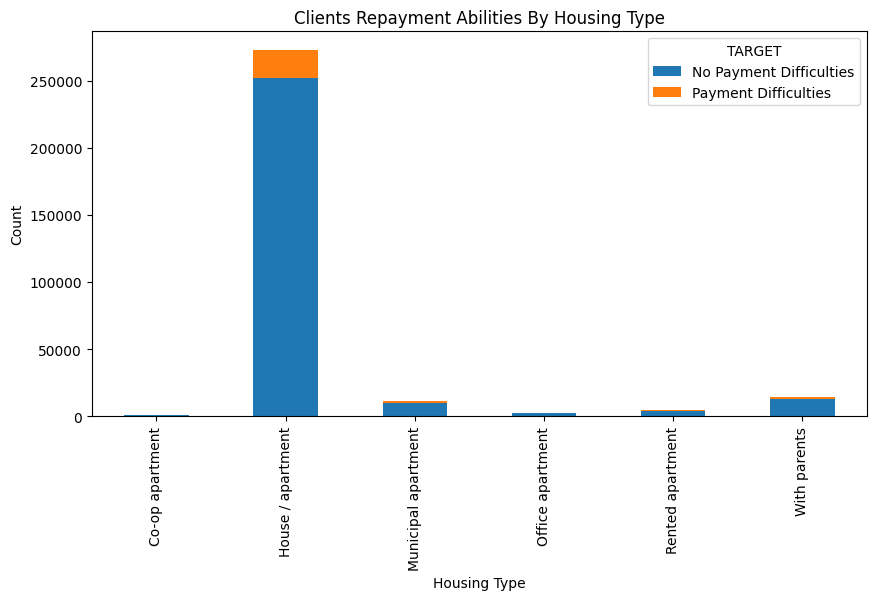

In [ ]:
# visualize
housing_type=housing_type.pivot(index='NAME_HOUSING_TYPE', columns='TARGET', values='COUNT')
housing_type.plot(kind='bar', stacked=True, figsize=(10,5))
plt.title('Clients Repayment Abilities By Housing Type')
plt.ylabel('Count')
plt.xlabel('Housing Type')
plt.show()



<small>Klien yang tinggal di rumah/apartemen memiliki jumlah pengajuan pinjaman tertinggi, yaitu sekitar 272 ribu aplikasi

Occupation Type Vs Target

In [ ]:
# Occupation Type Vs Target
occupation_type=train.groupby(by=['OCCUPATION_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Occupation Type')
occupation_type.rename(columns={'SK_ID_CURR':'COUNT'}, inplace=True)
occupation_type


Clients Repayment Abilities By Occupation Type


,OCCUPATION_TYPE,TARGET,COUNT
0,Accountants,No Payment Difficulties,9339
1,Accountants,Payment Difficulties,474
2,Cleaning staff,No Payment Difficulties,4206
3,Cleaning staff,Payment Difficulties,447
4,Cooking staff,No Payment Difficulties,5325
5,Cooking staff,Payment Difficulties,621
6,Core staff,No Payment Difficulties,25832
7,Core staff,Payment Difficulties,1738
8,Drivers,No Payment Difficulties,16496
9,Drivers,Payment Difficulties,2107


<small>Banyak aplikasi (55 ribu) diajukan oleh klien yang bekerja sebagai buruh. Klien dengan jenis pekerjaan buruh berkeahlian rendah memiliki persentase tertinggi (sekitar 17%) pada TARGET = 1, artinya mengalami kesulitan dalam pembayaran pinjaman.

Process Day Vs Target

In [ ]:
# Process Day Vs Target
process_day=train.groupby(by=['WEEKDAY_APPR_PROCESS_START','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Process Day')
process_day.rename(columns={'SK_ID_CURR':'COUNT'}, inplace=True)
process_day


Clients Repayment Abilities By Process Day


,WEEKDAY_APPR_PROCESS_START,TARGET,COUNT
0,FRIDAY,No Payment Difficulties,46237
1,FRIDAY,Payment Difficulties,4101
2,MONDAY,No Payment Difficulties,46780
3,MONDAY,Payment Difficulties,3934
4,SATURDAY,No Payment Difficulties,31182
5,SATURDAY,Payment Difficulties,2670
6,SUNDAY,No Payment Difficulties,14898
7,SUNDAY,Payment Difficulties,1283
8,THURSDAY,No Payment Difficulties,46493
9,THURSDAY,Payment Difficulties,4098


In [ ]:
train_df[['WEEKDAY_APPR_PROCESS_START','TARGET']].groupby(['WEEKDAY_APPR_PROCESS_START'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,WEEKDAY_APPR_PROCESS_START,TARGET
5,TUESDAY,0.083505
6,WEDNESDAY,0.081604
0,FRIDAY,0.081469
4,THURSDAY,0.081003
3,SUNDAY,0.079291
2,SATURDAY,0.078873
1,MONDAY,0.077572


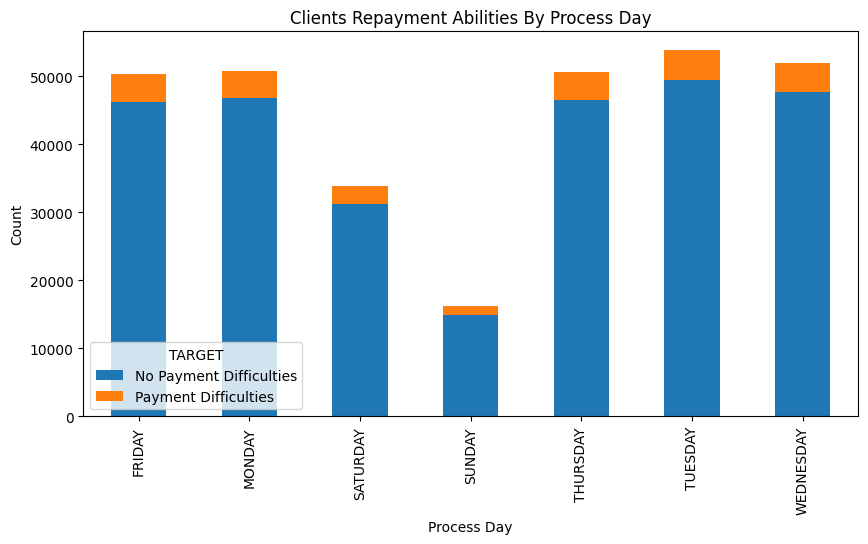

In [ ]:
# visualize
process_day=process_day.pivot(index='WEEKDAY_APPR_PROCESS_START', columns='TARGET', values='COUNT')
process_day.plot(kind='bar', stacked=True, figsize=(10,5))
plt.title('Clients Repayment Abilities By Process Day')
plt.ylabel('Count')
plt.xlabel('Process Day')
plt.show()

<small>Setiap hari, persentase kesulitan pembayaran pinjaman (TARGET = 1) selalu hampir sama, berkisar antara 7% - 8%.

Organization Type Vs Target

In [ ]:
#Organization Type Vs Target
organization_type=train.groupby(by=['ORGANIZATION_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Organization Type')
organization_type.rename(columns={'SK_ID_CURR':'COUNT'}, inplace=True)
organization_type

Clients Repayment Abilities By Organization Type


,ORGANIZATION_TYPE,TARGET,COUNT
0,Advertising,No Payment Difficulties,394
1,Advertising,Payment Difficulties,35
2,Agriculture,No Payment Difficulties,2197
3,Agriculture,Payment Difficulties,257
4,Bank,No Payment Difficulties,2377
...,...,...,...
111,Transport: type 4,Payment Difficulties,501
112,University,No Payment Difficulties,1262
113,University,Payment Difficulties,65
114,XNA,No Payment Difficulties,52384


In [ ]:
train_df[['ORGANIZATION_TYPE','TARGET']].groupby(['ORGANIZATION_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,ORGANIZATION_TYPE,TARGET
54,Transport: type 3,0.157540
18,Industry: type 13,0.134328
25,Industry: type 8,0.125000
38,Restaurant,0.117062
7,Construction,0.116798
6,Cleaning,0.111538
14,Industry: type 1,0.110683
20,Industry: type 3,0.106162
36,Realtor,0.106061
1,Agriculture,0.104727


<small>Dalam jenis transportasi organisasi, tipe 3 memiliki persentase tertinggi (sekitar 15%) pada TARGET = 1, menandakan kesulitan dalam pembayaran kembali pinjaman.

Bivariate: Numerical Features Vs Target

<ipython-input-44-a853603c9f2c>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(train["AMT_CREDIT"])


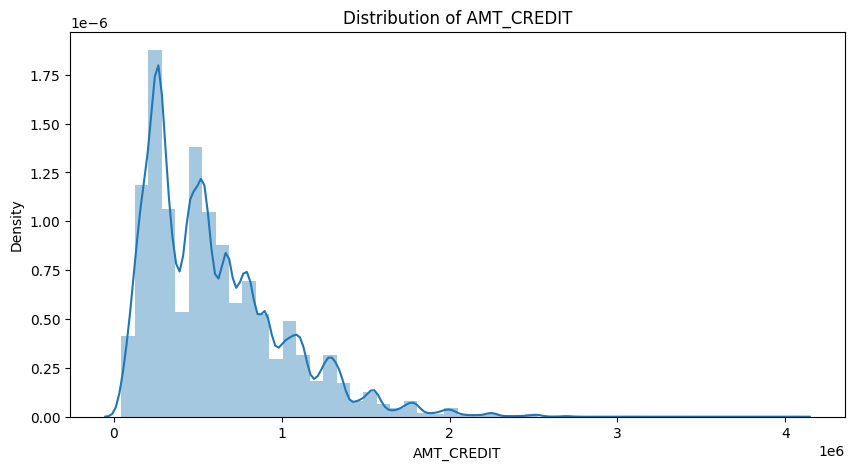

In [ ]:
# Amount Credit of the Loan Vs Target
plt.figure(figsize=(10,5))
plt.title("Distribution of AMT_CREDIT")
ax = sns.distplot(train["AMT_CREDIT"])




<ipython-input-45-3ff99907f655>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="TARGET", y="AMT_CREDIT", data=train, palette="Set1")


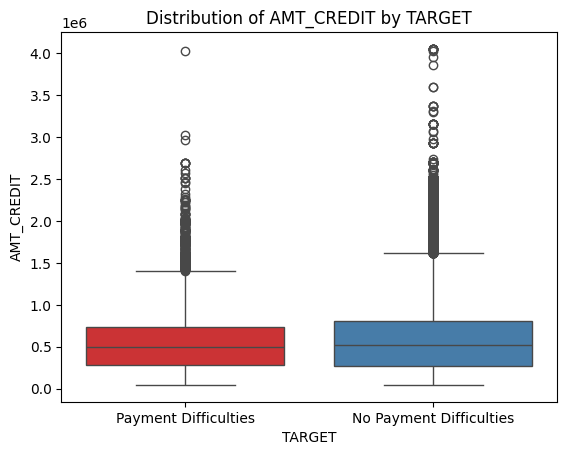

In [ ]:
sns.boxplot(x="TARGET", y="AMT_CREDIT", data=train, palette="Set1")
plt.title("Distribution of AMT_CREDIT by TARGET")
plt.show()

<small>Median jumlah kredit nasabah yang lancar pembayarannya sedikit lebih tinggi daripada nasabah yang mengalami kesulitan pembayaran. Ini menunjukkan bahwa nasabah dengan jumlah kredit yang lebih tinggi memiliki kemungkinan lebih besar untuk mampu membayar kembali pinjamannya dibandingkan dengan nasabah yang memiliki jumlah kredit lebih rendah.

Amount Income Vs Target

<ipython-input-46-4e472a2ec117>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(train["AMT_INCOME_TOTAL"])


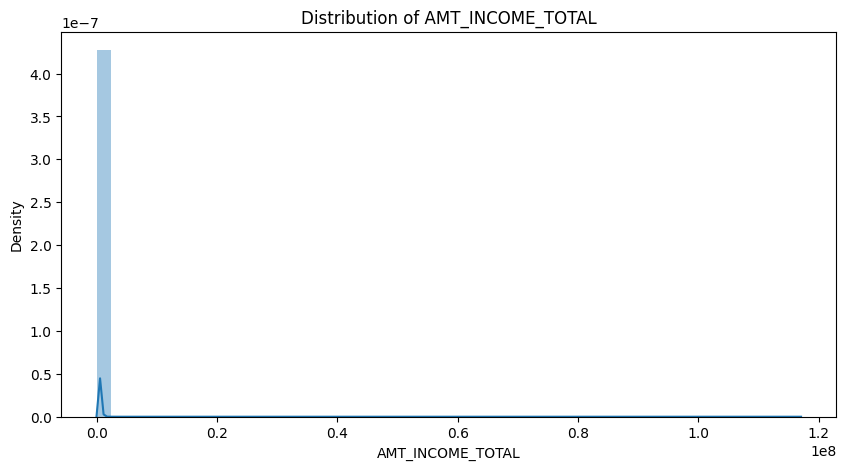

In [ ]:
# Amount Income Vs Target
plt.figure(figsize=(10,5))
plt.title("Distribution of AMT_INCOME_TOTAL")
ax = sns.distplot(train["AMT_INCOME_TOTAL"])


<ipython-input-47-52614bec7582>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="TARGET", y="AMT_INCOME_TOTAL", data=train, palette="Set1")


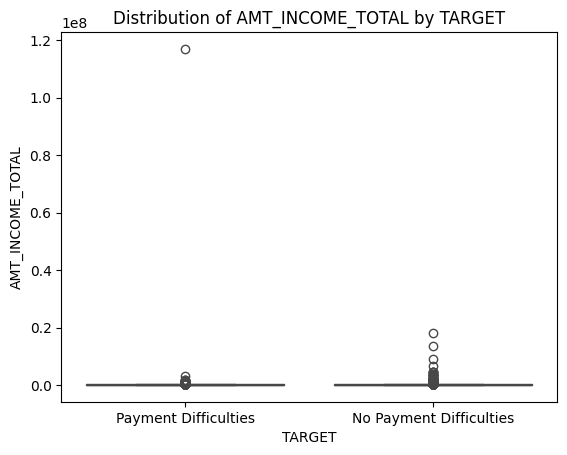

In [ ]:
sns.boxplot(x="TARGET", y="AMT_INCOME_TOTAL", data=train, palette="Set1")
plt.title("Distribution of AMT_INCOME_TOTAL by TARGET")
plt.show()

<small>Pada pengamatan tersebut, baik klien yang mampu membayar dengan lancar maupun yang mengalami kesulitan pembayaran, sebagian besar memiliki nilai yang serupa. Namun, terdapat tren bahwa seiring dengan peningkatan pendapatan nasabah, kemungkinan untuk tidak mengalami kesulitan dalam membayar kembali pinjaman juga meningkat. Selain itu, median jumlah kredit nasabah yang tidak mengalami kesulitan pembayaran sedikit lebih tinggi, menunjukkan bahwa nasabah dengan jumlah kredit yang lebih tinggi memiliki peluang sedikit lebih besar untuk sukses membayar kembali pinjamannya dibandingkan dengan nasabah yang memiliki jumlah kredit lebih rendah

Age Vs target

In [ ]:
# Age Vs target
no_age = train_df[train_df['TARGET']==0]['DAYS_BIRTH'].values/-365
yes_age = train_df[train_df['TARGET']==1]['DAYS_BIRTH'].values/-365

<ipython-input-49-da26f8d67b36>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


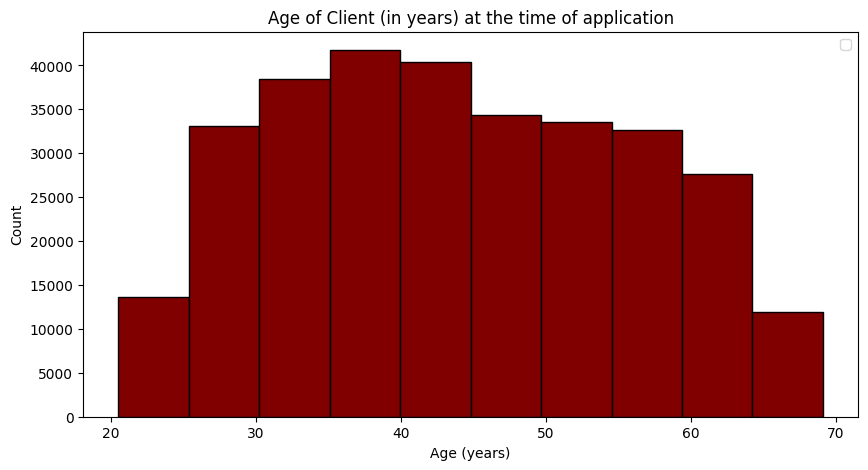

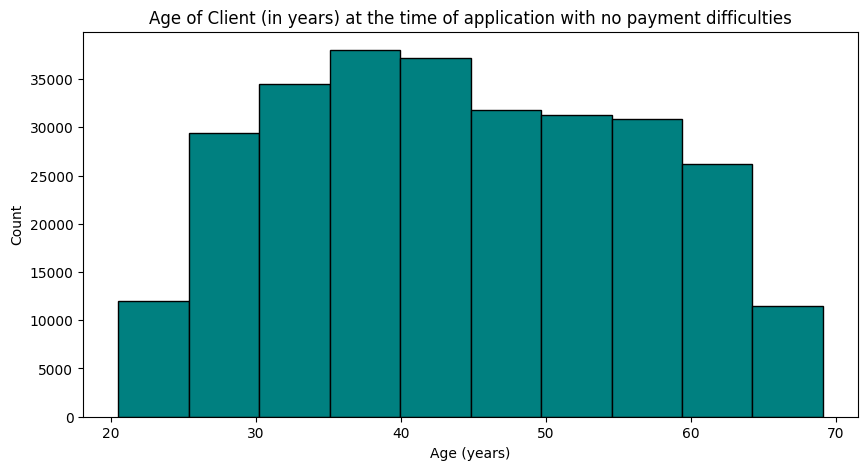

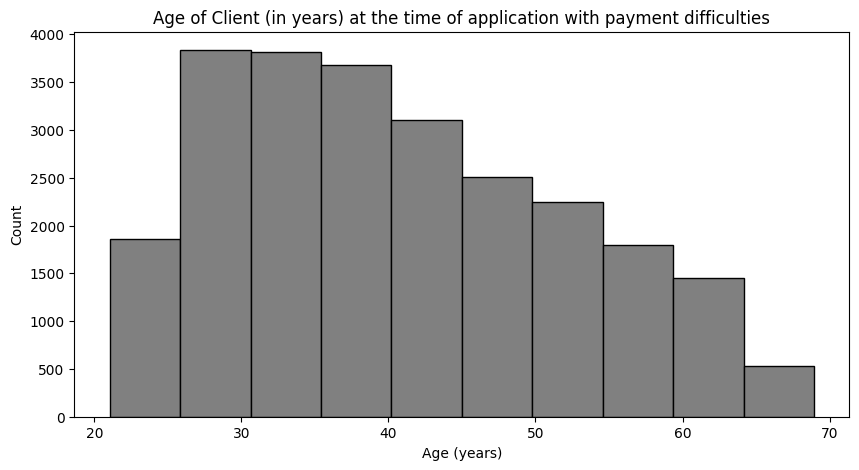

In [ ]:
# visualisasi
plt.figure(figsize=(10,5))
plt.hist(train_df['DAYS_BIRTH'].values/-365, bins=10, edgecolor='black', color='maroon')
plt.title('Age of Client (in years) at the time of application')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.hist(no_age, bins=10, edgecolor='black', color='teal')
plt.title('Age of Client (in years) at the time of application with no payment difficulties')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10,5))
plt.hist(yes_age, bins=10, edgecolor='black', color='gray')
plt.title('Age of Client (in years) at the time of application with payment difficulties')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.show()


<small>Jumlah pengajuan pinjaman terbanyak berasal dari nasabah yang berusia 35-40 tahun, diikuti oleh nasabah dalam rentang usia 40-45 tahun. Sementara itu, permintaan pinjaman dari nasabah berusia <25 atau >65 tahun sangat sedikit.

Nasabah yang tidak mengalami kesulitan pembayaran umumnya berusia 35-45 tahun. Sebaliknya, nasabah yang menghadapi kesulitan pembayaran cenderung berada dalam rentang usia 25-35 tahun

Multivariat Visualization

<small>Grouped by Realty Ownership Status

<b><small>1. Car Ownership Status, The Number of Children, Target, and House/Flat Ownership Status

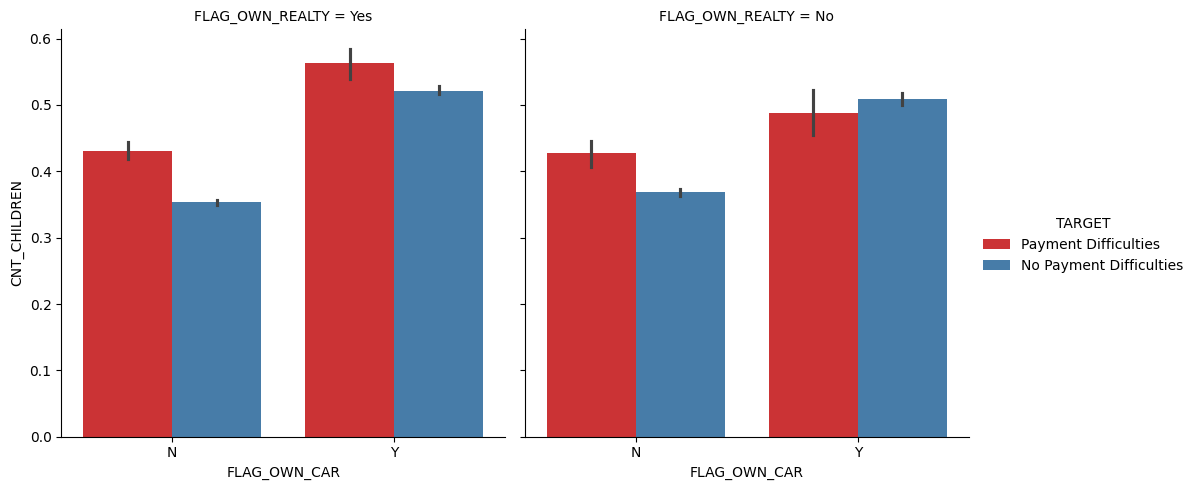

In [ ]:
#  Car Ownership Status, The Number of Children, Target, and House/Flat Ownership Status
sns.catplot(x='FLAG_OWN_CAR',y='CNT_CHILDREN',hue='TARGET',col='FLAG_OWN_REALTY',data=train,kind='bar',palette='Set1')
plt.show()

<b><small>2. Income Type, Amount of Goods Price, Target, and House/Flat Ownership Status

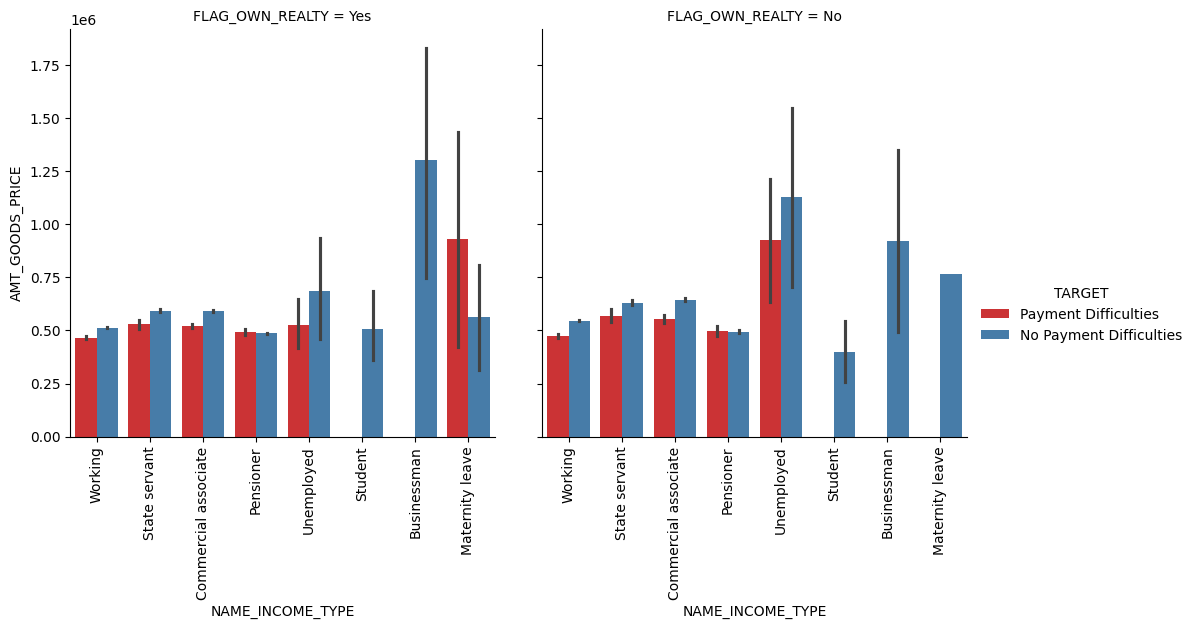

In [ ]:
# Income Type, Amount of Goods Price, Target, and House/Flat Ownership Status
fig = sns.catplot(x='NAME_INCOME_TYPE',y='AMT_GOODS_PRICE',hue='TARGET',col='FLAG_OWN_REALTY',data=train,kind='bar',palette='Set1')
fig.set_xticklabels(rotation=90)
plt.show()


<small>Klien yang berstatus cuti hamil dan memiliki rumah/flat (FLAG_OWN_REALTY = Ya) cenderung mengalami kesulitan dalam pembayaran pinjaman dibandingkan dengan klien yang tidak memiliki rumah/flat (FLAG_OWN_REALTY = Tidak).

<b><small>3. Family Status, Amount of Income, Target, and House/Flat Ownership Status

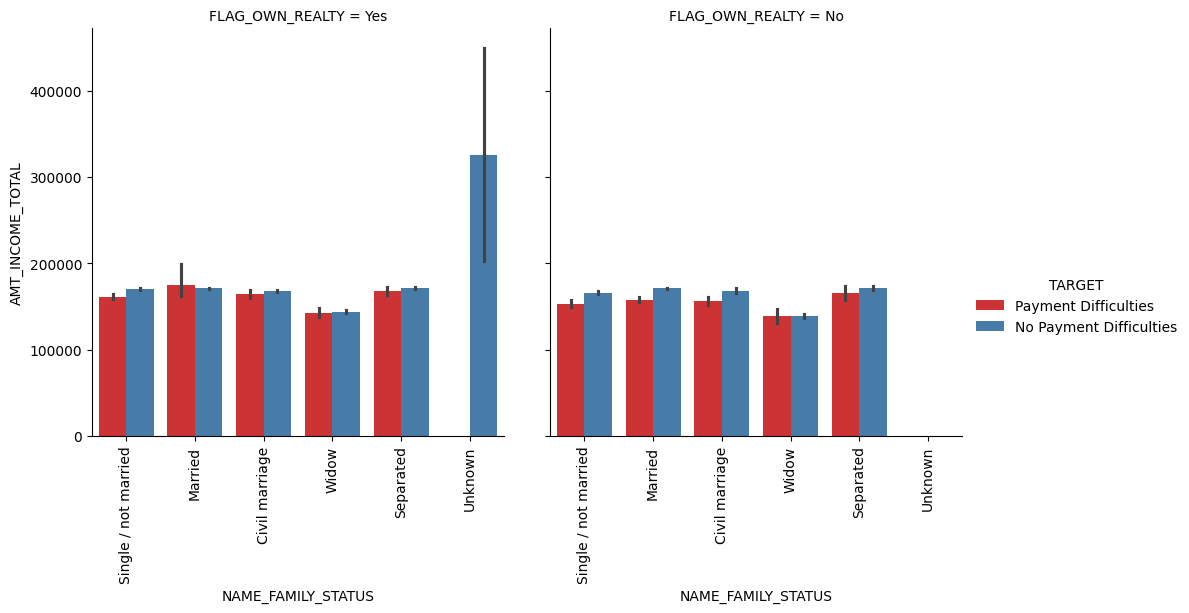

In [ ]:
# Family Status, Amount of Income, Target, and House/Flat Ownership Status
fig = sns.catplot(x='NAME_FAMILY_STATUS',y='AMT_INCOME_TOTAL',hue='TARGET',col='FLAG_OWN_REALTY',data=train,kind='bar',palette='Set1')
fig.set_xticklabels(rotation=90)
plt.show()

<small>Nasabah yang sudah menikah dan memiliki rumah/flat (FLAG_OWN_REALTY = Ya) cenderung mengalami kesulitan dalam membayar pinjaman dengan pendapatan menengah dibandingkan dengan nasabah yang tidak memiliki rumah/flat (FLAG_OWN_REALTY = Tidak).

Grouped by Car Ownership Status

<b>1. Contract Type, The Number of Children, Target, and Car Ownership Status

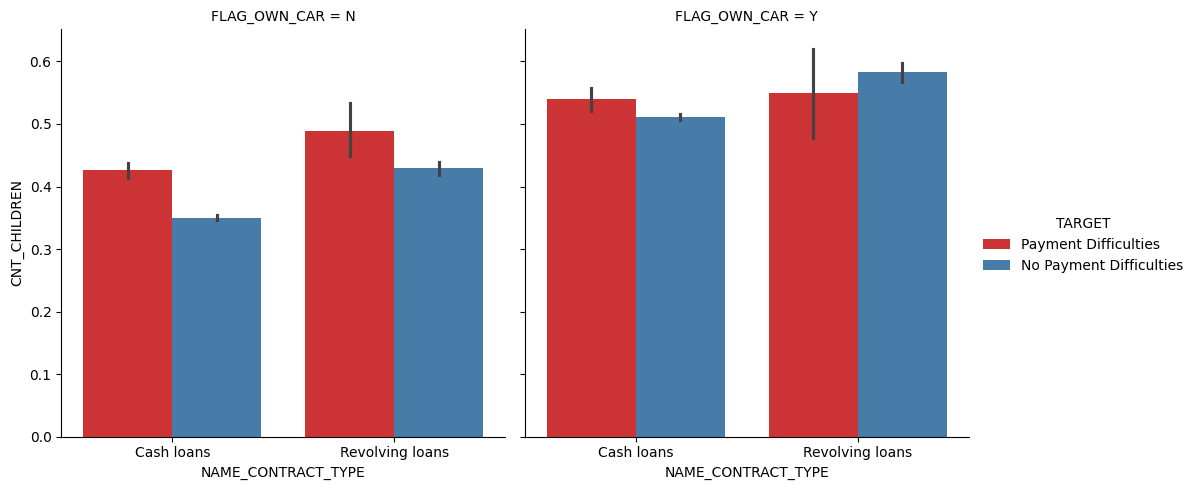

In [ ]:
#Contract Type, The Number of Children, Target, and Car Ownership Status
sns.catplot(x='NAME_CONTRACT_TYPE',y='CNT_CHILDREN',hue='TARGET',col='FLAG_OWN_CAR',data=train,kind='bar',palette='Set1')
plt.show()

<small>Klien yang memiliki pinjaman bergulir dan tidak memiliki mobil (FLAG_OWN_CAR = Tidak) cenderung mengalami kesulitan dalam pembayaran pinjaman dibandingkan dengan yang memiliki mobil (FLAG_OWN_CAR = Ya).

Grouped by Contract Type

<small><b>1. Income Type, Amount of Credit, Target, and Contract Type

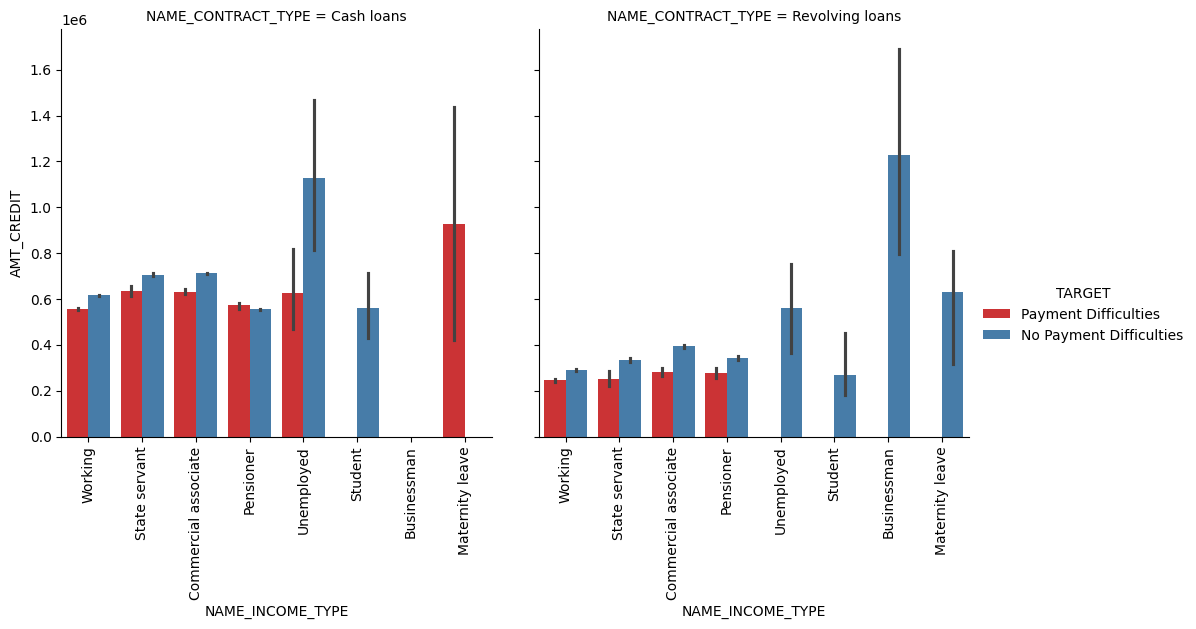

In [ ]:
#Income Type, Amount of Credit, Target, and Contract Type
fig = sns.catplot(x='NAME_INCOME_TYPE',y='AMT_CREDIT',hue='TARGET',col='NAME_CONTRACT_TYPE',data=train,kind='bar',palette='Set1')
fig.set_xticklabels(rotation=90)
plt.show()

<small>Klien yang sedang cuti hamil dan mengajukan pinjaman tunai umumnya mengalami kesulitan membayar kembali pinjaman, terutama untuk jumlah kredit menengah. Namun, klien dengan cuti hamil dan pinjaman bergulir cenderung tidak mengalami kesulitan dalam pembayaran.

Bagi klien yang menganggur dan mengajukan pinjaman tunai, lebih dari 50% dari mereka mengalami masalah dalam membayar kembali pinjaman dengan jumlah kredit sedang. Di sisi lain, klien yang menganggur dan memiliki pinjaman bergulir tidak menghadapi kesulitan dalam pembayaran.

Semua klien pelajar tidak mengalami kesulitan membayar kembali pinjaman, baik dengan pinjaman tunai atau pinjaman bergulir, terutama untuk jumlah kredit rendah hingga menengah

Grouped by Rating of Region where Client Lives

<small><b>1. Housing Type, Amount Credit of Loan, Target, and Rating of Region where Client Lives

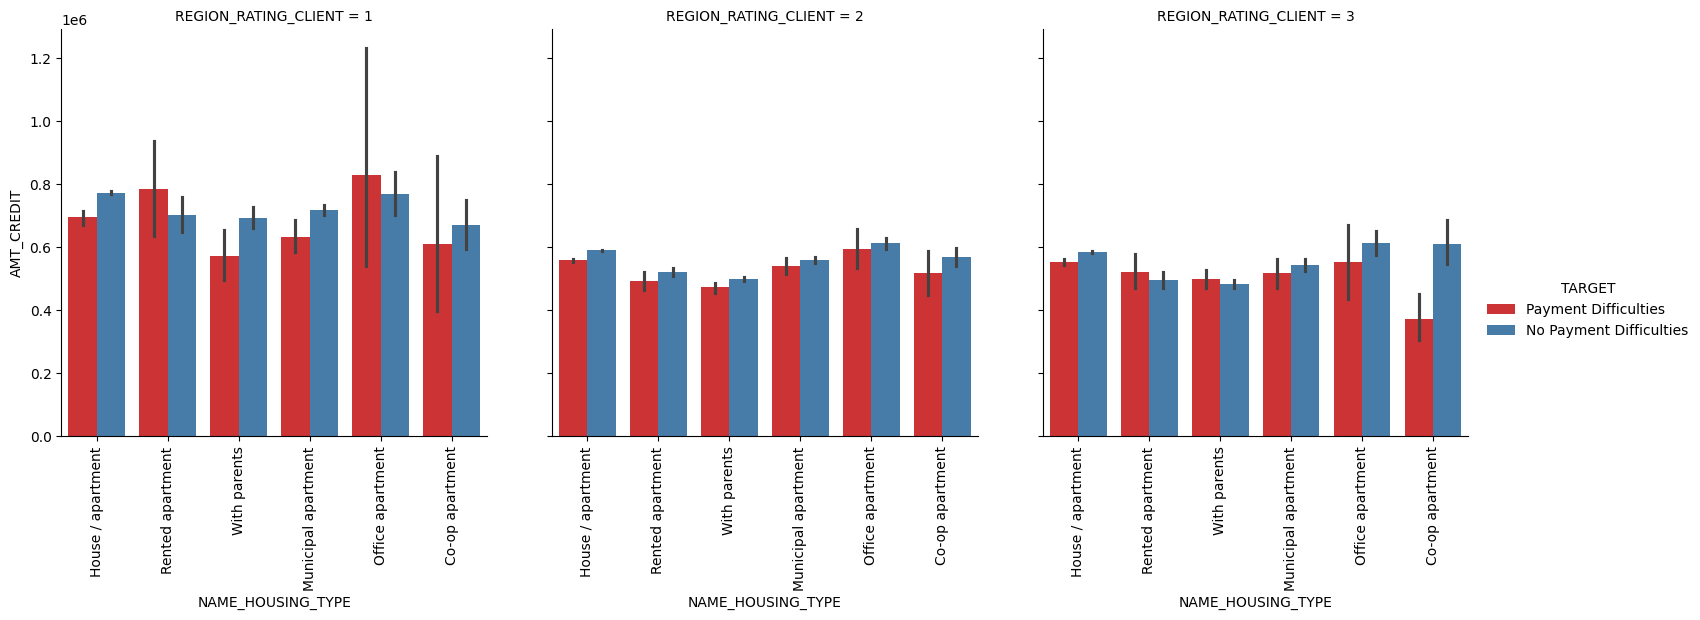

In [ ]:
# Housing Type, Amount Credit of Loan, Target, and Rating of Region where Client Lives
fig = sns.catplot(x='NAME_HOUSING_TYPE',y='AMT_CREDIT',hue='TARGET',col='REGION_RATING_CLIENT',data=train,kind='bar',palette='Set1')
fig.set_xticklabels(rotation=90)
plt.show()

<small>Nasabah yang tinggal di apartemen sewaan dan apartemen perkantoran dengan wilayah peringkat 1 cenderung mengalami kesulitan dalam membayar kembali pinjaman, terutama untuk jumlah pinjaman kredit menengah. Hal ini berbeda dengan nasabah di wilayah peringkat 2 yang memiliki tingkat kesulitan yang lebih rendah.

<b><small>2. Education Type, Amount Credit of Loan, Target, and Rating of Region where Client Lives

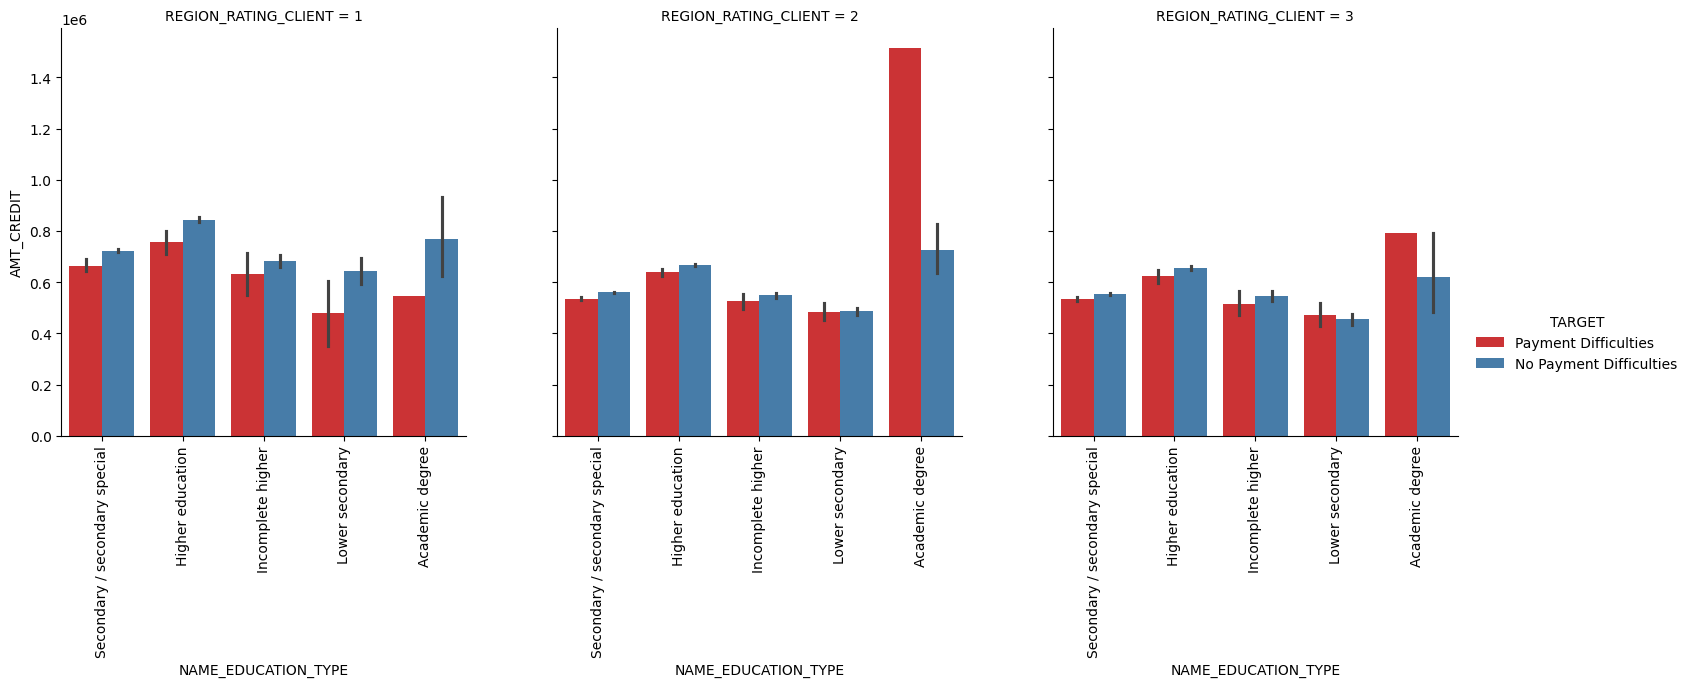

In [ ]:
# Education Type, Amount Credit of Loan, Target, and Rating of Region where Client Lives
fig = sns.catplot(x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',hue='TARGET',col='REGION_RATING_CLIENT',data=train,kind='bar',palette='Set1')
fig.set_xticklabels(rotation=90)
plt.show()

<small>Nasabah dengan gelar akademis yang tinggal di wilayah peringkat 2 cenderung mengalami kesulitan membayar kembali pinjaman, terutama untuk jumlah kredit yang lebih tinggi. Sementara itu, nasabah dengan gelar yang sama namun tinggal di wilayah peringkat 3 memiliki masalah dalam membayar kembali pinjaman, khususnya untuk jumlah kredit sedang.

<b><small>3. Family Status, Amount Credit of Loan, Target, and Rating of Region where Client Lives

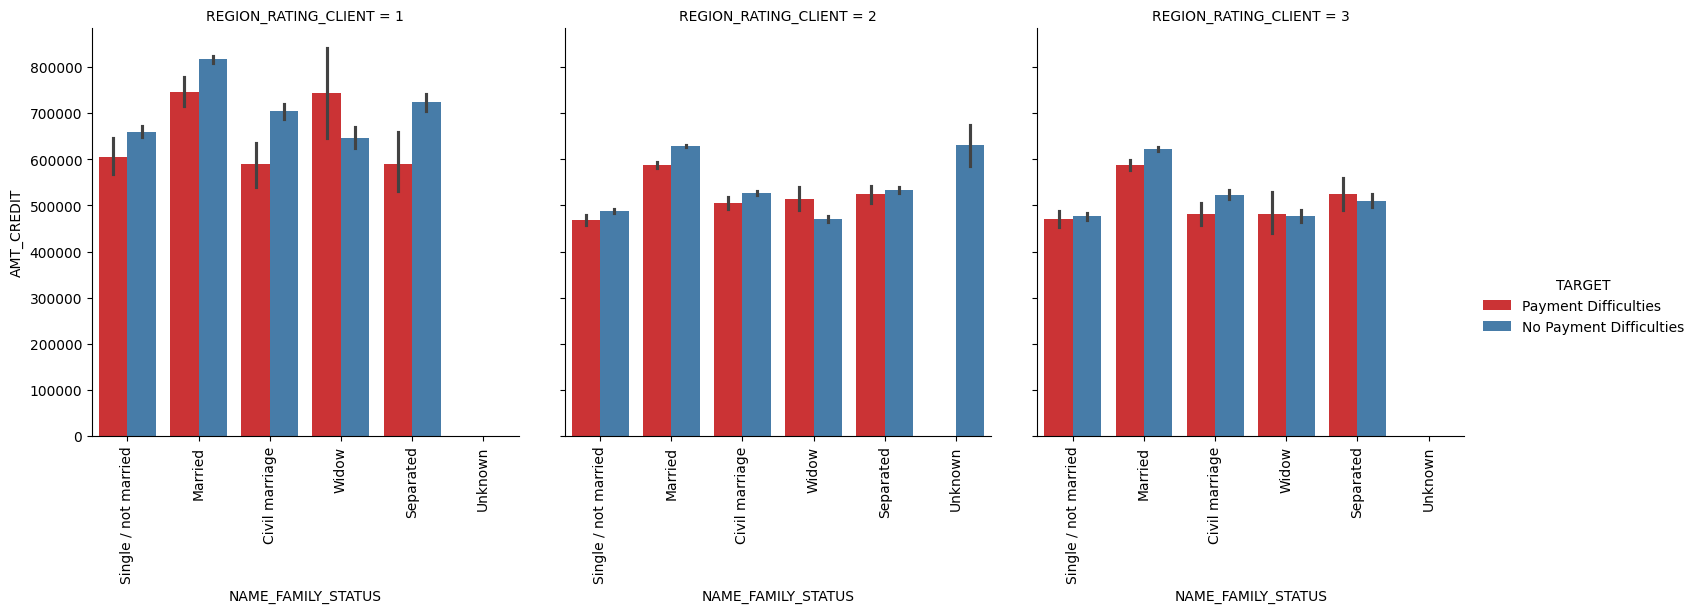

In [ ]:
# Family Status, Amount Credit of Loan, Target, and Rating of Region where Client Lives
fig = sns.catplot(x='NAME_FAMILY_STATUS',y='AMT_CREDIT',hue='TARGET',col='REGION_RATING_CLIENT',data=train,kind='bar',palette='Set1')
fig.set_xticklabels(rotation=90)
plt.show()

<small>Nasabah berstatus janda, baik yang tinggal di daerah peringkat 1, 2, atau 3, menghadapi kesulitan dalam membayar kembali pinjaman, terutama untuk jumlah kredit pinjaman yang sedang hingga tinggi.

Sementara itu, nasabah berstatus terpisah yang tinggal di wilayah peringkat 3 juga mengalami kesulitan dalam pembayaran pinjaman, khususnya untuk jumlah kredit yang moderat, dibandingkan dengan nasabah yang tinggal di wilayah peringkat 1 atau 2.

<h3>Data Cleaning

Detecting Data Duplication

In [ ]:
# duplicate data
print('duplicat data :',train_df.duplicated().sum())

duplicat data : 0


Detecting Missing Values

In [ ]:
# Detecting Missing Values
print('Missing Values :',train_df.isnull().values.any())
nvc = pd.DataFrame(train_df.isnull().sum().sort_values(ascending=False)[:25])
nvc['Percentage'] = round(nvc[0]/len(train_df)*100,2)
nvc.reset_index(inplace=True)
nvc.columns = ['Column Name','Missing Values Count','Percentage']
nvc


Missing Values : True


,Column Name,Missing Values Count,Percentage
0,COMMONAREA_AVG,214865,69.87
1,COMMONAREA_MODE,214865,69.87
2,COMMONAREA_MEDI,214865,69.87
3,NONLIVINGAPARTMENTS_MEDI,213514,69.43
4,NONLIVINGAPARTMENTS_MODE,213514,69.43
5,NONLIVINGAPARTMENTS_AVG,213514,69.43
6,FONDKAPREMONT_MODE,210295,68.39
7,LIVINGAPARTMENTS_AVG,210199,68.35
8,LIVINGAPARTMENTS_MEDI,210199,68.35
9,LIVINGAPARTMENTS_MODE,210199,68.35


In [ ]:
# drop features that have large number of missing values (± 50%)
train_df.drop(train_df.iloc[:, 44:91], inplace = True, axis = 1)
train_df.drop(['OWN_CAR_AGE','EXT_SOURCE_1'], inplace = True, axis = 1)


In [ ]:
# # after drop some features
print('Missing values status:', train_df.isnull().values.any())
nvc = pd.DataFrame(train_df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/train_df.shape[0])*100
nvc.sort_values(by=['Percentage'], ascending=False).reset_index()

Missing values status: True


,index,Total Null Values,Percentage
0,OCCUPATION_TYPE,96391,31.345545
1,EXT_SOURCE_3,60965,19.825307
2,AMT_REQ_CREDIT_BUREAU_QRT,41519,13.501631
3,AMT_REQ_CREDIT_BUREAU_MON,41519,13.501631
4,AMT_REQ_CREDIT_BUREAU_HOUR,41519,13.501631
...,...,...,...
68,FLAG_DOCUMENT_5,0,0.000000
69,FLAG_DOCUMENT_8,0,0.000000
70,FLAG_DOCUMENT_9,0,0.000000
71,FLAG_DOCUMENT_3,0,0.000000


<ipython-input-62-6c2e62274fd9>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['AMT_REQ_CREDIT_BUREAU_YEAR'], ax=ax[0][0])
<ipython-input-62-6c2e62274fd9>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['AMT_REQ_CREDIT_BUREAU_MON'], ax=ax[0][1])
<ipython-input-62-6c2e62274fd

<Axes: xlabel='AMT_REQ_CREDIT_BUREAU_DAY', ylabel='Density'>

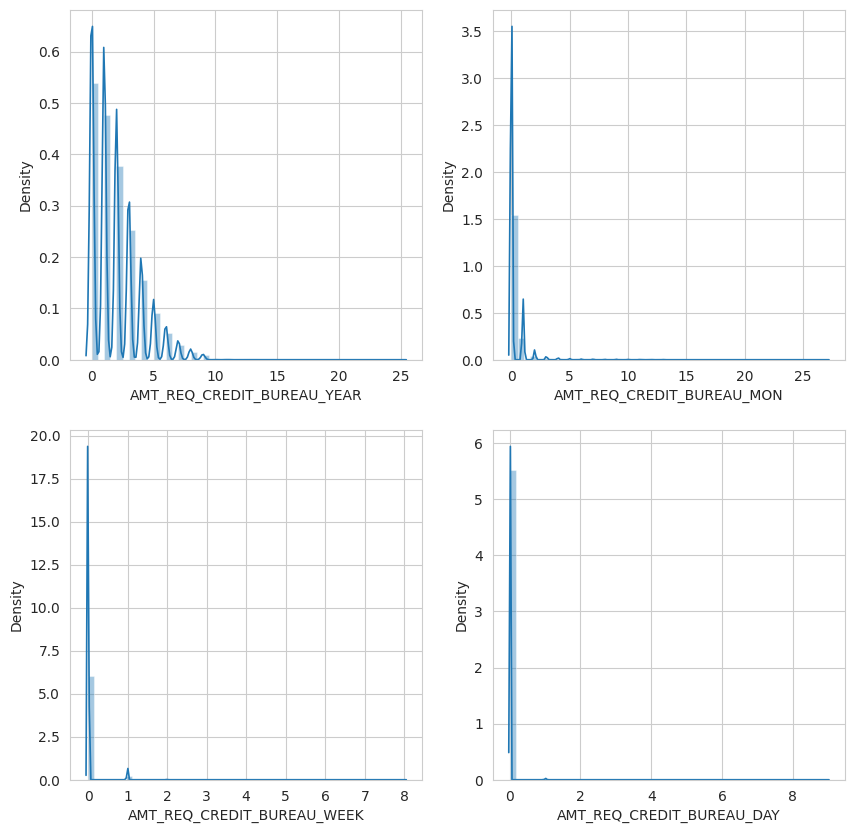

In [ ]:
# distribution of numerical features that have missing values pt.1
sns.set_style('whitegrid')
fig, ax = plt.subplots(2,2, figsize=(10,10))
sns.set_context('paper', font_scale=1)

sns.distplot(train_df['AMT_REQ_CREDIT_BUREAU_YEAR'], ax=ax[0][0])

sns.distplot(train_df['AMT_REQ_CREDIT_BUREAU_MON'], ax=ax[0][1])

sns.distplot(train_df['AMT_REQ_CREDIT_BUREAU_WEEK'], ax=ax[1][0])

sns.distplot(train_df['AMT_REQ_CREDIT_BUREAU_DAY'], ax=ax[1][1])

<ipython-input-63-878b99f76de8>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['DEF_60_CNT_SOCIAL_CIRCLE'], ax=ax[0][0])
<ipython-input-63-878b99f76de8>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['OBS_60_CNT_SOCIAL_CIRCLE'], ax=ax[0][1])
<ipython-input-63-878b99f76de8>:

<Axes: xlabel='OBS_30_CNT_SOCIAL_CIRCLE', ylabel='Density'>

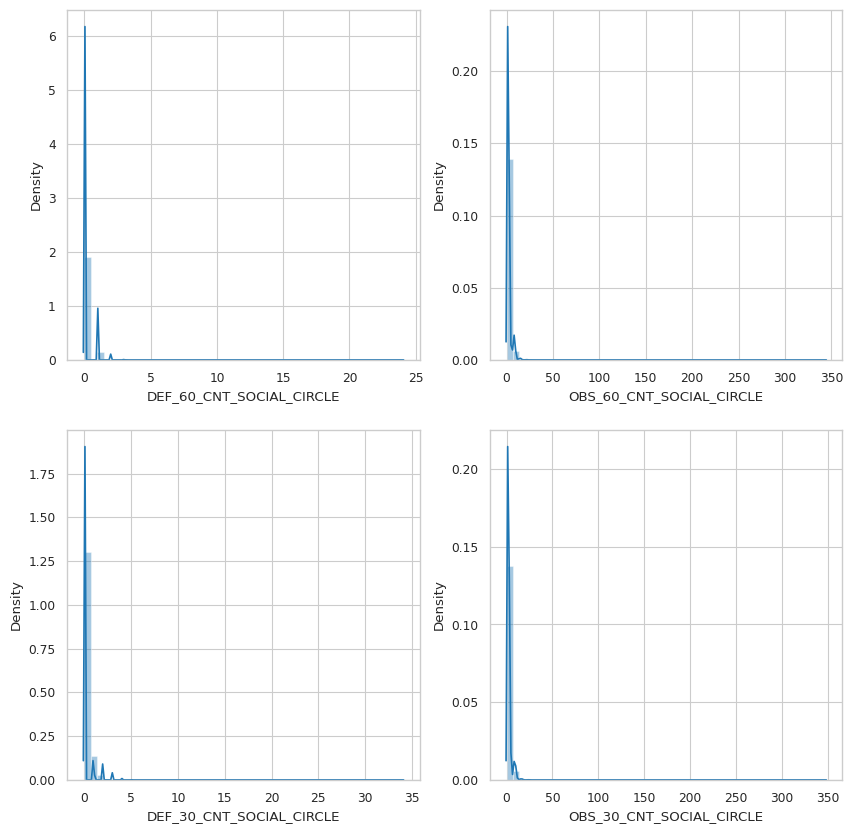

In [ ]:
# distribution of numerical features that have missing values pt.3
sns.set_style('whitegrid')
fig, ax = plt.subplots(2,2, figsize=(10,10))
sns.set_context('paper', font_scale=1)

sns.distplot(train_df['DEF_60_CNT_SOCIAL_CIRCLE'], ax=ax[0][0])

sns.distplot(train_df['OBS_60_CNT_SOCIAL_CIRCLE'], ax=ax[0][1])

sns.distplot(train_df['DEF_30_CNT_SOCIAL_CIRCLE'], ax=ax[1][0])

sns.distplot(train_df['OBS_30_CNT_SOCIAL_CIRCLE'], ax=ax[1][1])

<ipython-input-64-f75db53039d7>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['CNT_FAM_MEMBERS'], ax=ax[0])
<ipython-input-64-f75db53039d7>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['DAYS_LAST_PHONE_CHANGE'], ax=ax[1])


<Axes: xlabel='DAYS_LAST_PHONE_CHANGE', ylabel='Density'>

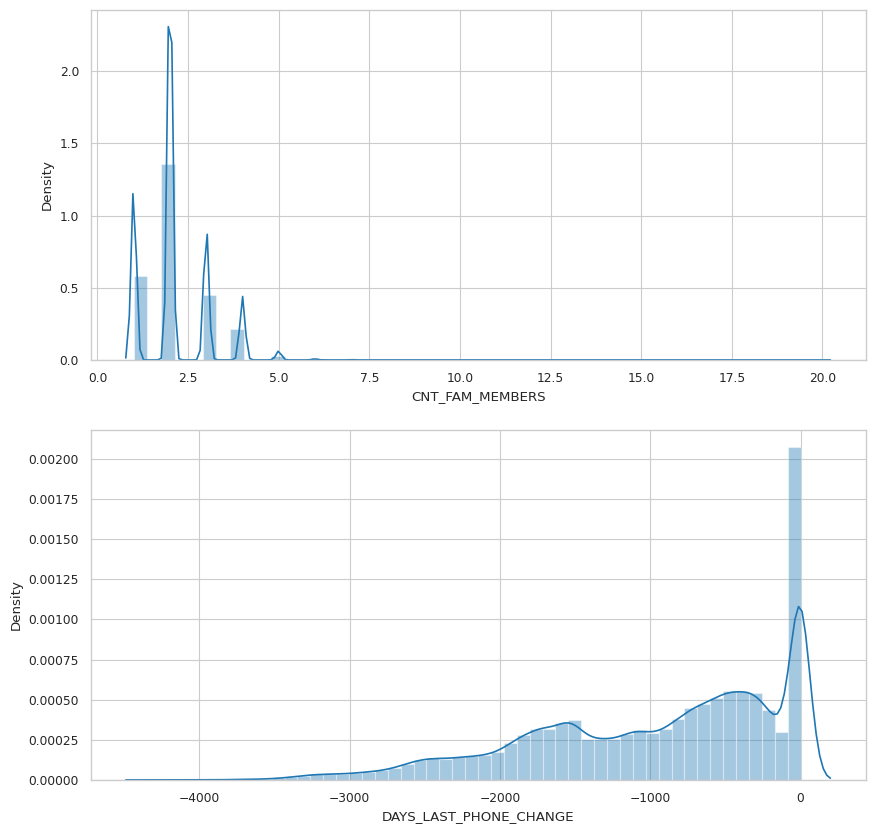

In [ ]:
# distribution of numerical features that have missing values pt.3
sns.set_style('whitegrid')
fig, ax = plt.subplots(2, figsize=(10,10))
sns.set_context('paper', font_scale=1)

sns.distplot(train_df['CNT_FAM_MEMBERS'], ax=ax[0])

sns.distplot(train_df['DAYS_LAST_PHONE_CHANGE'], ax=ax[1])

<small>Sebaran ciri-ciri numerik yang disebutkan cenderung miring, menunjukkan bahwa median lebih representatif daripada rata-rata. Oleh karena itu, nilai yang hilang pada ciri-ciri tersebut akan diperhitungkan menggunakan median

In [ ]:
# impute missing values with median because the data is skewed for numerical features
# impute missing values with mode for categorical features

category_cols = train_df.select_dtypes(include=['object']).columns.tolist()
numeric_cols = train_df.select_dtypes(include=['int64','float64']).columns.tolist()

for column in train_df:
    if train_df[column].isnull().any():
        if(column in category_cols):
            train_df[column]=train_df[column].fillna(train_df[column].mode()[0])
        else:
            train_df[column]=train_df[column].fillna(train_df[column].median())

In [ ]:
# after impute missing values
print('Missing values status:', train_df.isnull().values.any())
nvc = pd.DataFrame(train_df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/train_df.shape[0])*100
nvc.sort_values(by=['Percentage'], ascending=False).reset_index()



Missing values status: False


,index,Total Null Values,Percentage
0,SK_ID_CURR,0,0.0
1,TARGET,0,0.0
2,NAME_CONTRACT_TYPE,0,0.0
3,CODE_GENDER,0,0.0
4,FLAG_OWN_CAR,0,0.0
...,...,...,...
68,AMT_REQ_CREDIT_BUREAU_DAY,0,0.0
69,AMT_REQ_CREDIT_BUREAU_WEEK,0,0.0
70,AMT_REQ_CREDIT_BUREAU_MON,0,0.0
71,AMT_REQ_CREDIT_BUREAU_QRT,0,0.0


<h3>Detecting Outliers

In [ ]:
# # dataset that only consist numerical features pt.1
num_train_df =  train_df[["CNT_CHILDREN", "AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE"]]
num_train_df.head()


,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
0,0,202500.0,406597.5,24700.5,351000.0
1,0,270000.0,1293502.5,35698.5,1129500.0
2,0,67500.0,135000.0,6750.0,135000.0
3,0,135000.0,312682.5,29686.5,297000.0
4,0,121500.0,513000.0,21865.5,513000.0


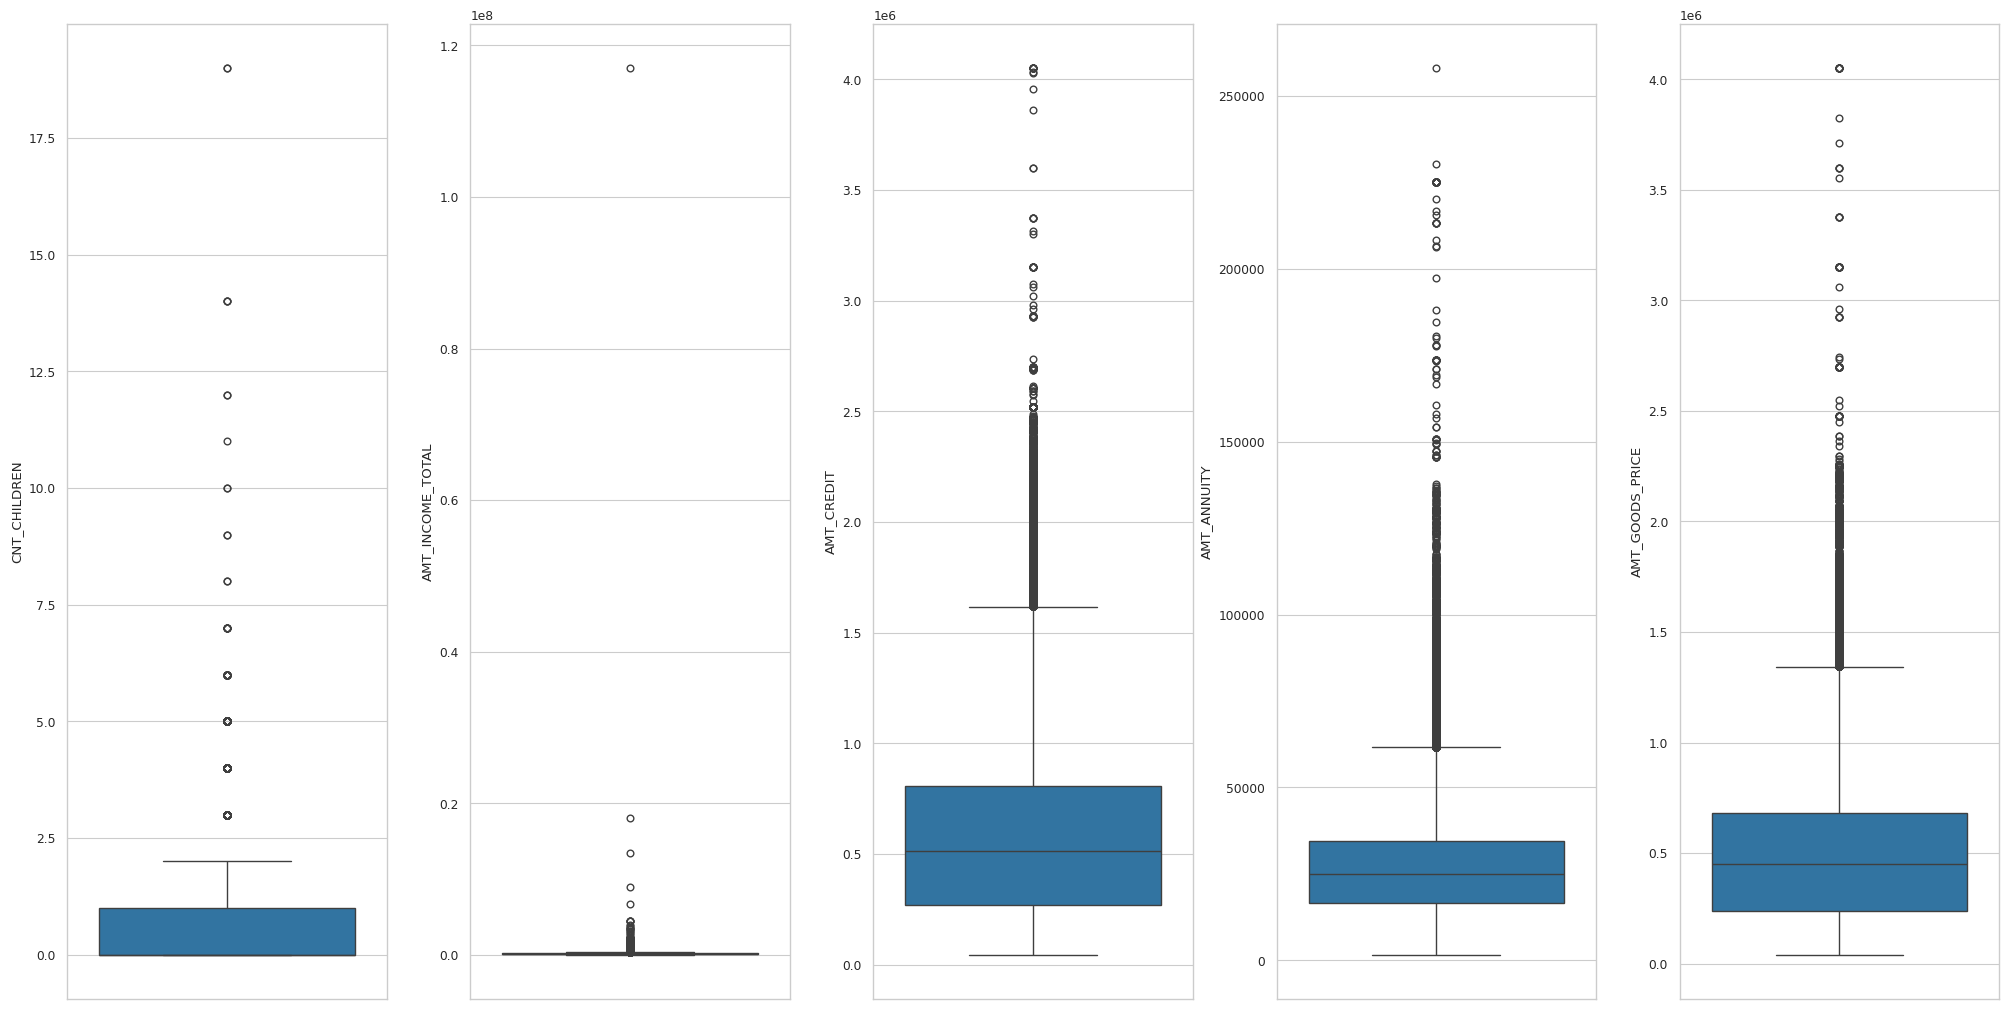

In [ ]:
#visualize
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in num_train_df.items():
    sns.boxplot(y = k, data = num_train_df, ax=axs[index])
    index += 1
    if index == 5:
      break;
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


In [ ]:
# dataset that only consist numerical features pt.2
num_train_df = train_df[["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "CNT_FAM_MEMBERS"]]
num_train_df.head()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS
0,-9461,-637,-3648.0,-2120,1.0
1,-16765,-1188,-1186.0,-291,2.0
2,-19046,-225,-4260.0,-2531,1.0
3,-19005,-3039,-9833.0,-2437,2.0
4,-19932,-3038,-4311.0,-3458,1.0


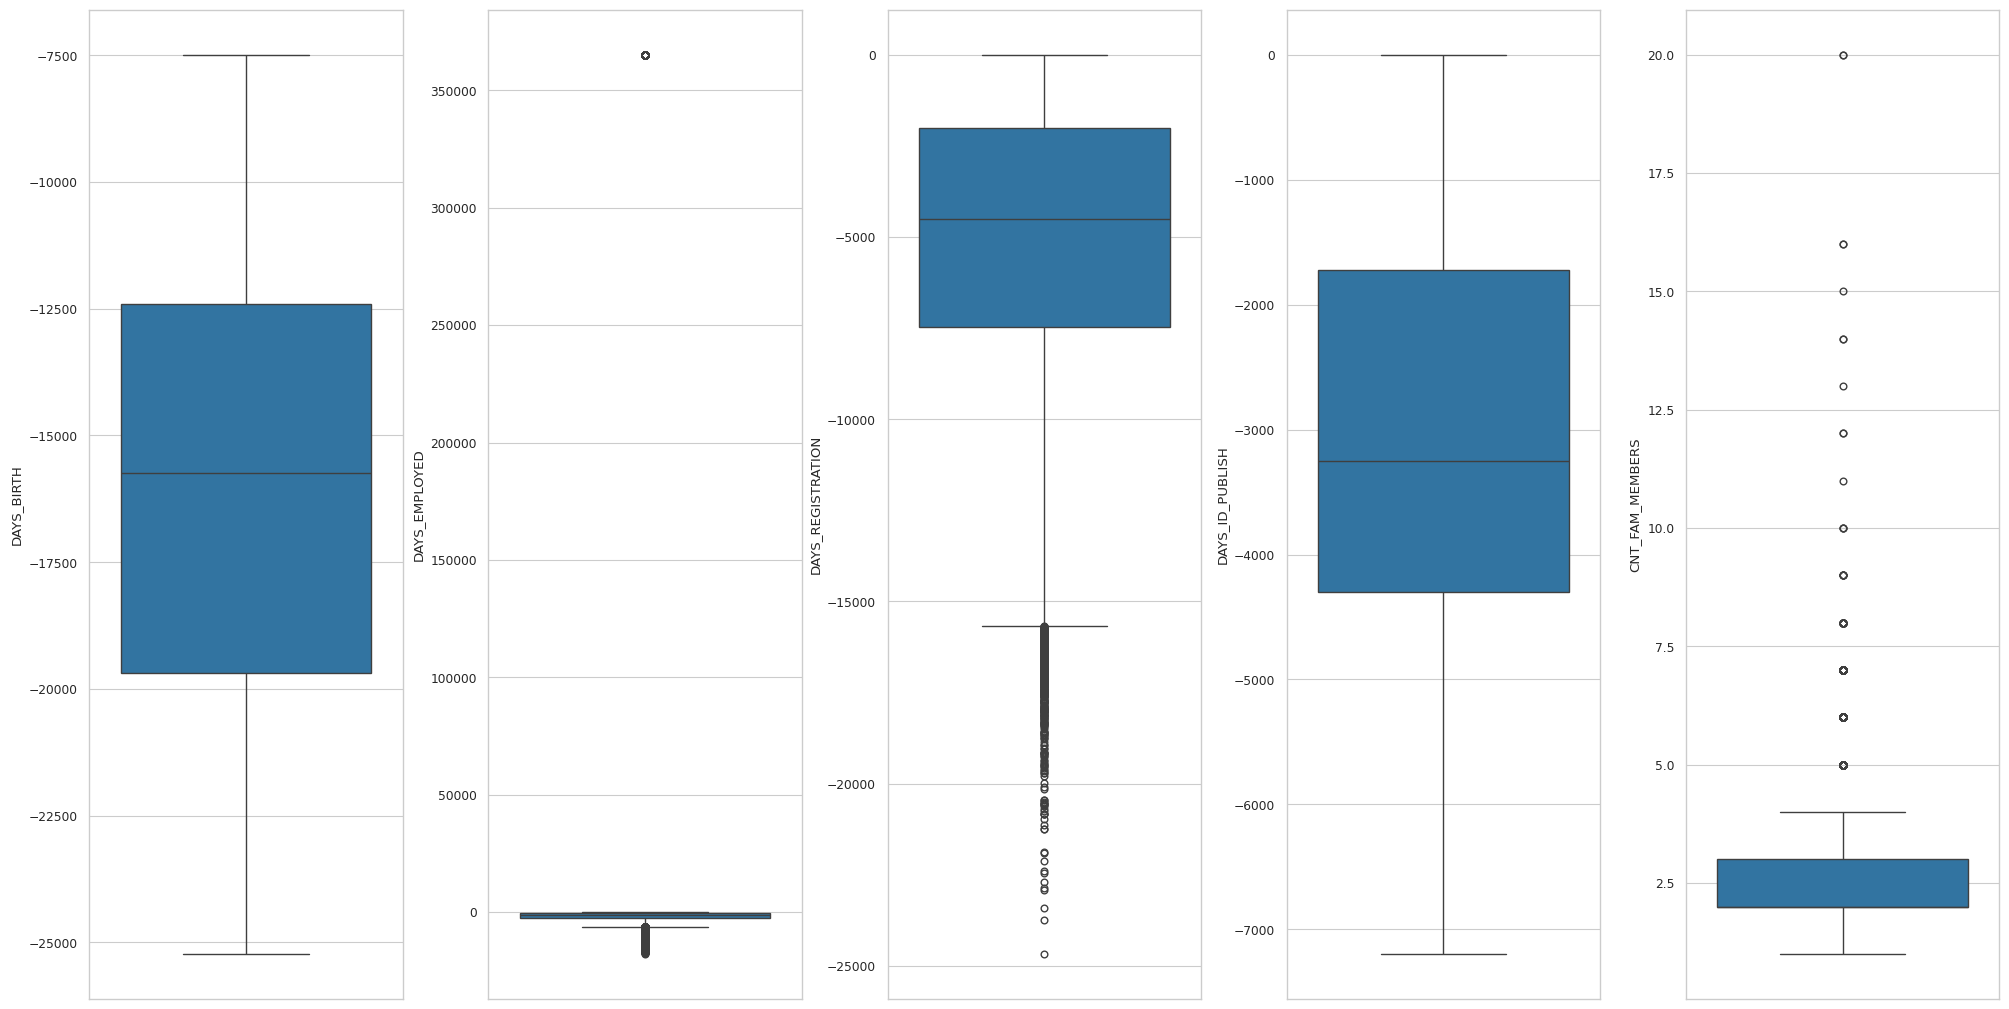

In [ ]:
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in num_train_df.items():
    sns.boxplot(y = k, data = num_train_df, ax=axs[index])
    index += 1
    if index == 5:
      break;
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


In [ ]:
# dataset that only consist numerical features pt.3
num_train_df = train_df[["AMT_REQ_CREDIT_BUREAU_YEAR", "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_HOUR"]]
num_train_df.head()

,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR
0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0


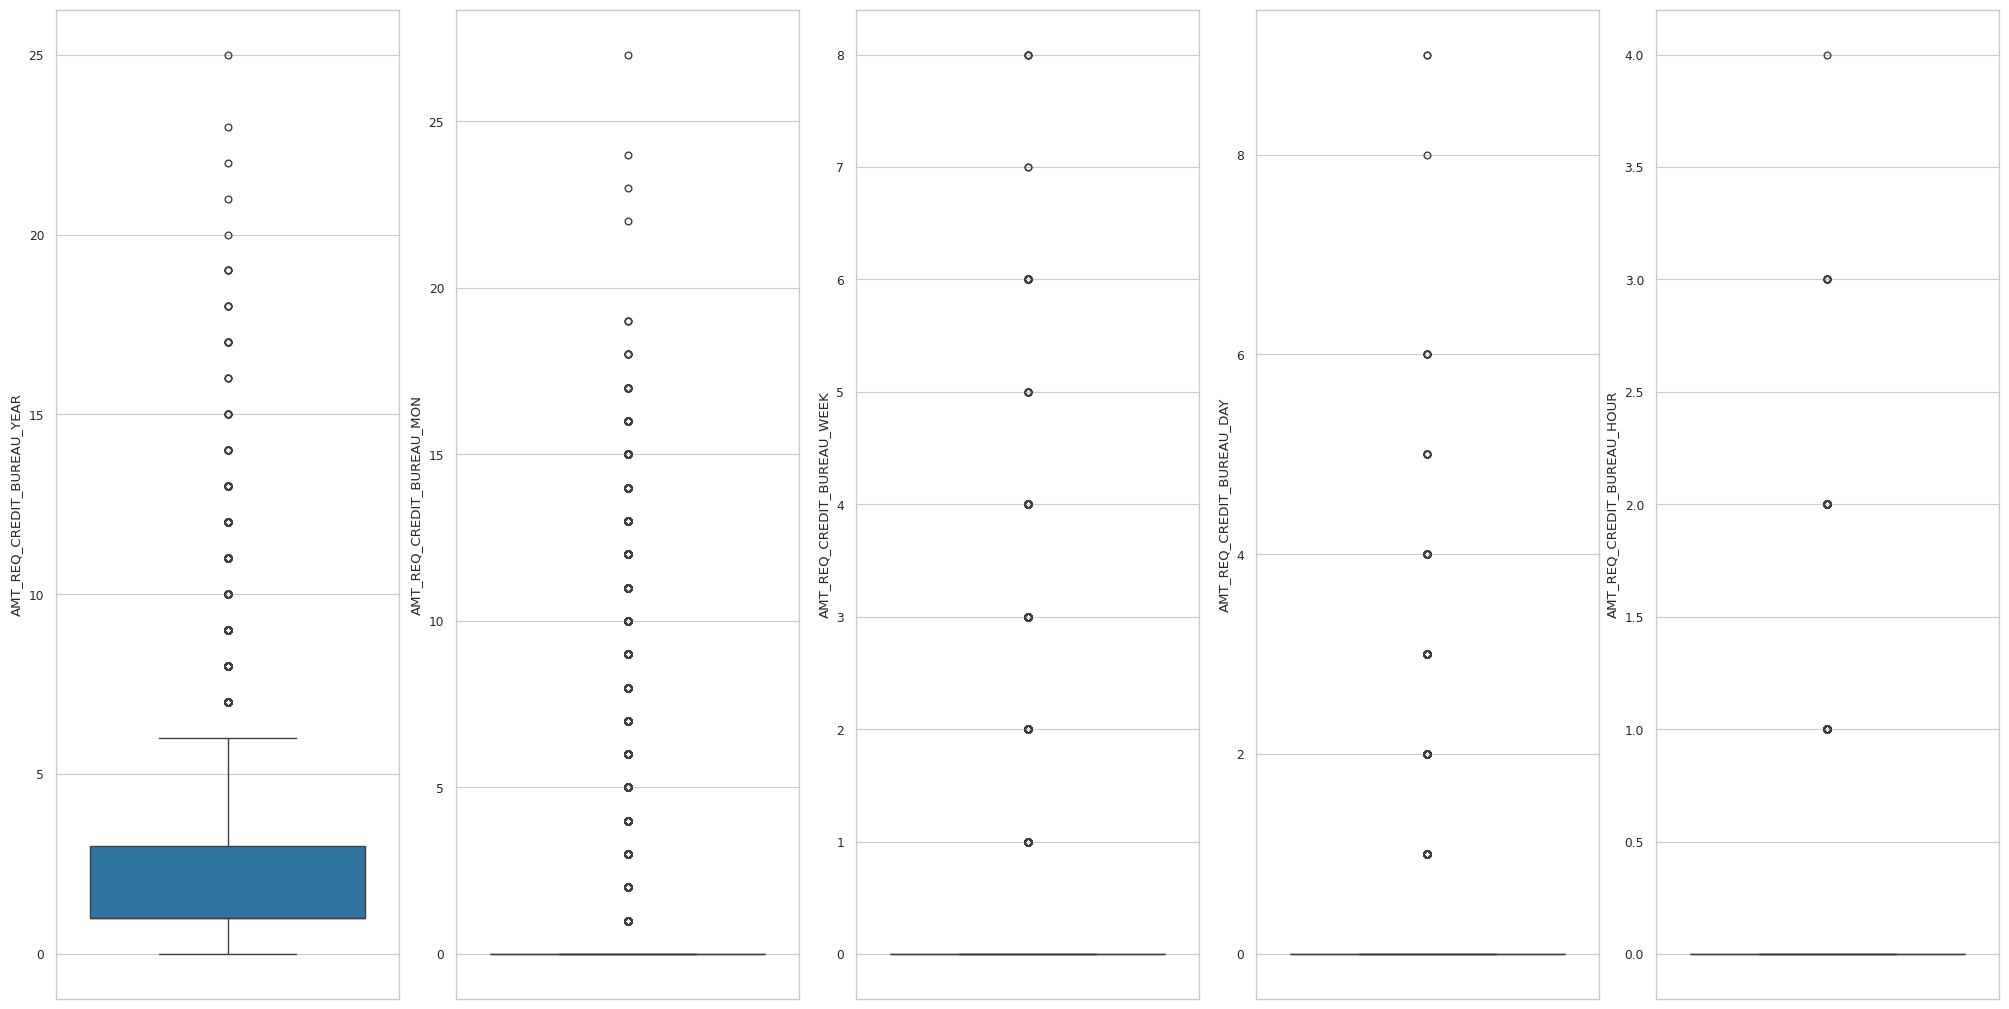

In [ ]:
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in num_train_df.items():
    sns.boxplot(y = k, data = num_train_df, ax=axs[index])
    index += 1
    if index == 5:
      break;
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)



In [ ]:
# # dataset that only consist numerical features pt.4
num_train_df = train_df[["DEF_60_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_30_CNT_SOCIAL_CIRCLE", "CNT_FAM_MEMBERS"]]
num_train_df.head()

,DEF_60_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,CNT_FAM_MEMBERS
0,2.0,2.0,2.0,2.0,1.0
1,0.0,1.0,0.0,1.0,2.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,2.0,0.0,2.0,2.0
4,0.0,0.0,0.0,0.0,1.0


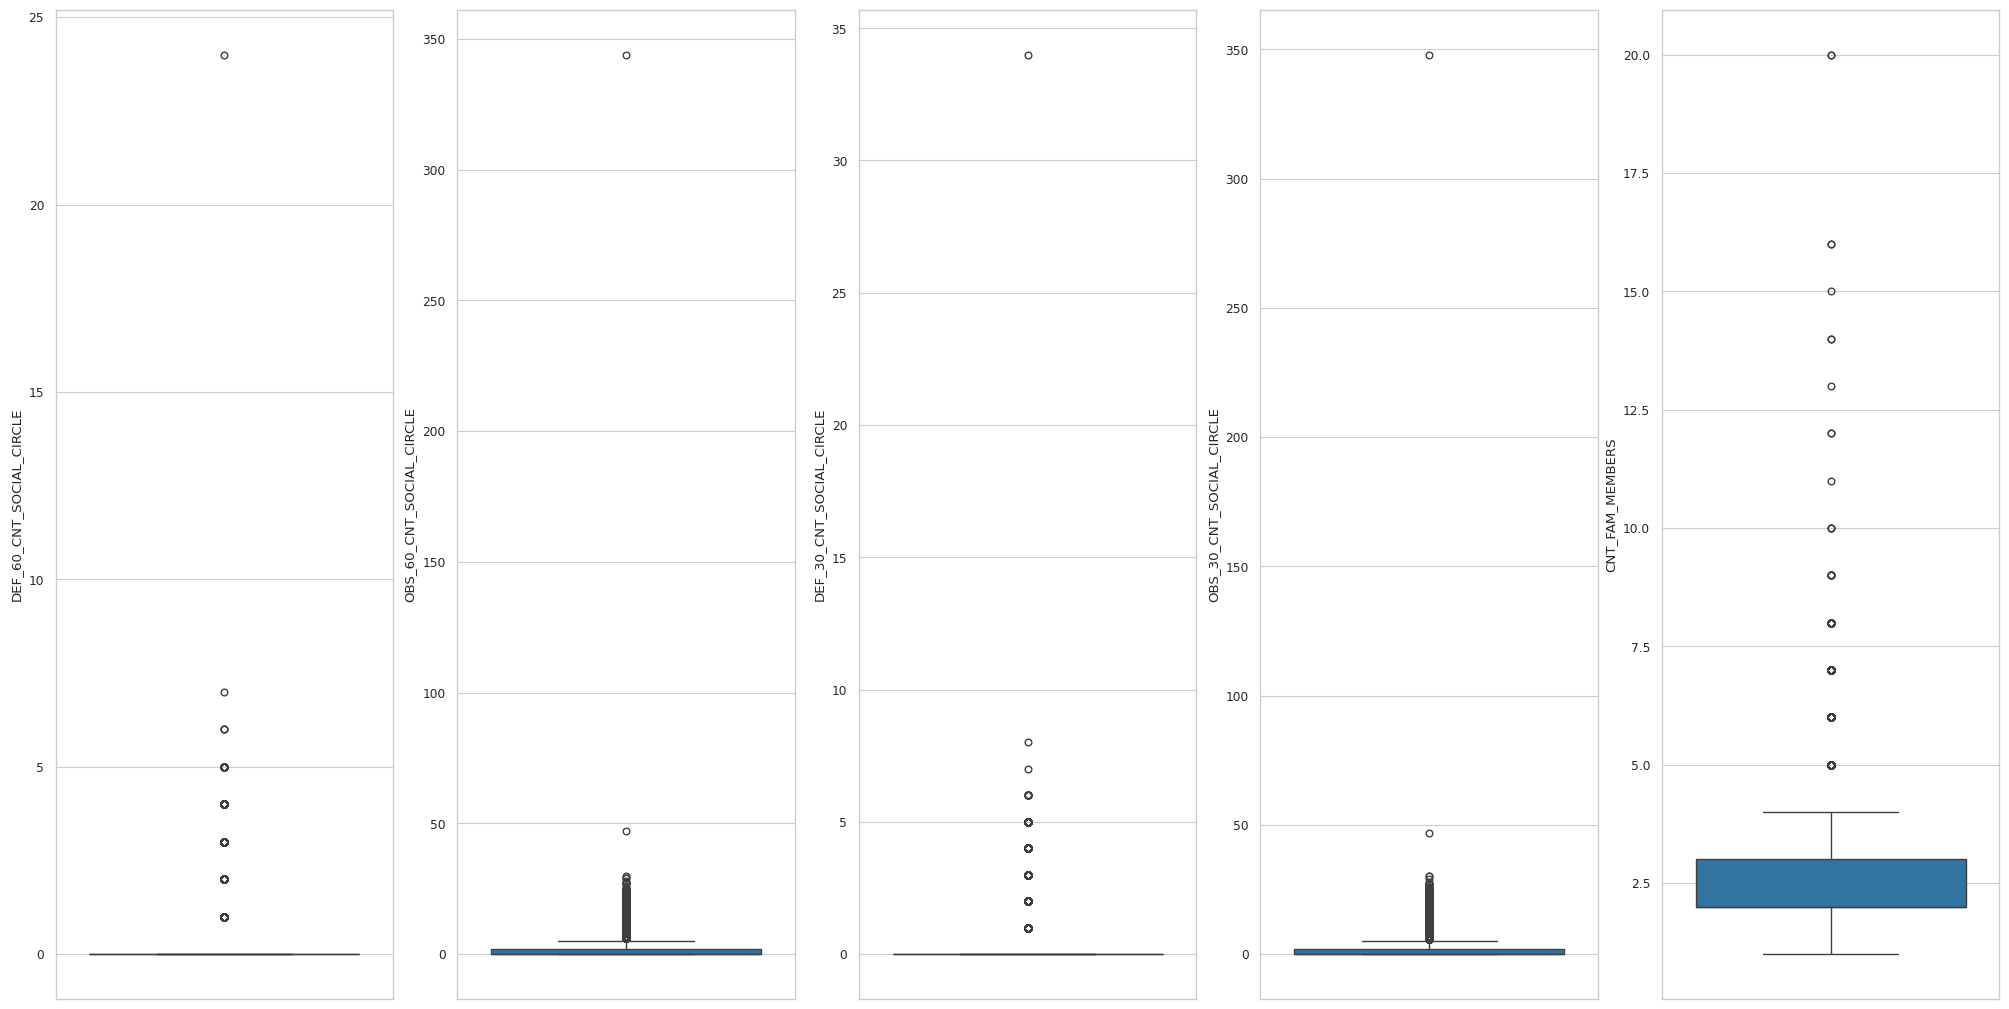

In [ ]:
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in num_train_df.items():
    sns.boxplot(y = k, data = num_train_df, ax=axs[index])
    index += 1
    if index == 5:
      break;
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
# dataset that only consist numerical features pt.5
num_train_df = train_df[["REGION_RATING_CLIENT", "HOUR_APPR_PROCESS_START", "DAYS_LAST_PHONE_CHANGE", "REGION_RATING_CLIENT_W_CITY", "REG_REGION_NOT_LIVE_REGION"]]
num_train_df.head()

,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,DAYS_LAST_PHONE_CHANGE,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION
0,2,10,-1134.0,2,0
1,1,11,-828.0,1,0
2,2,9,-815.0,2,0
3,2,17,-617.0,2,0
4,2,11,-1106.0,2,0


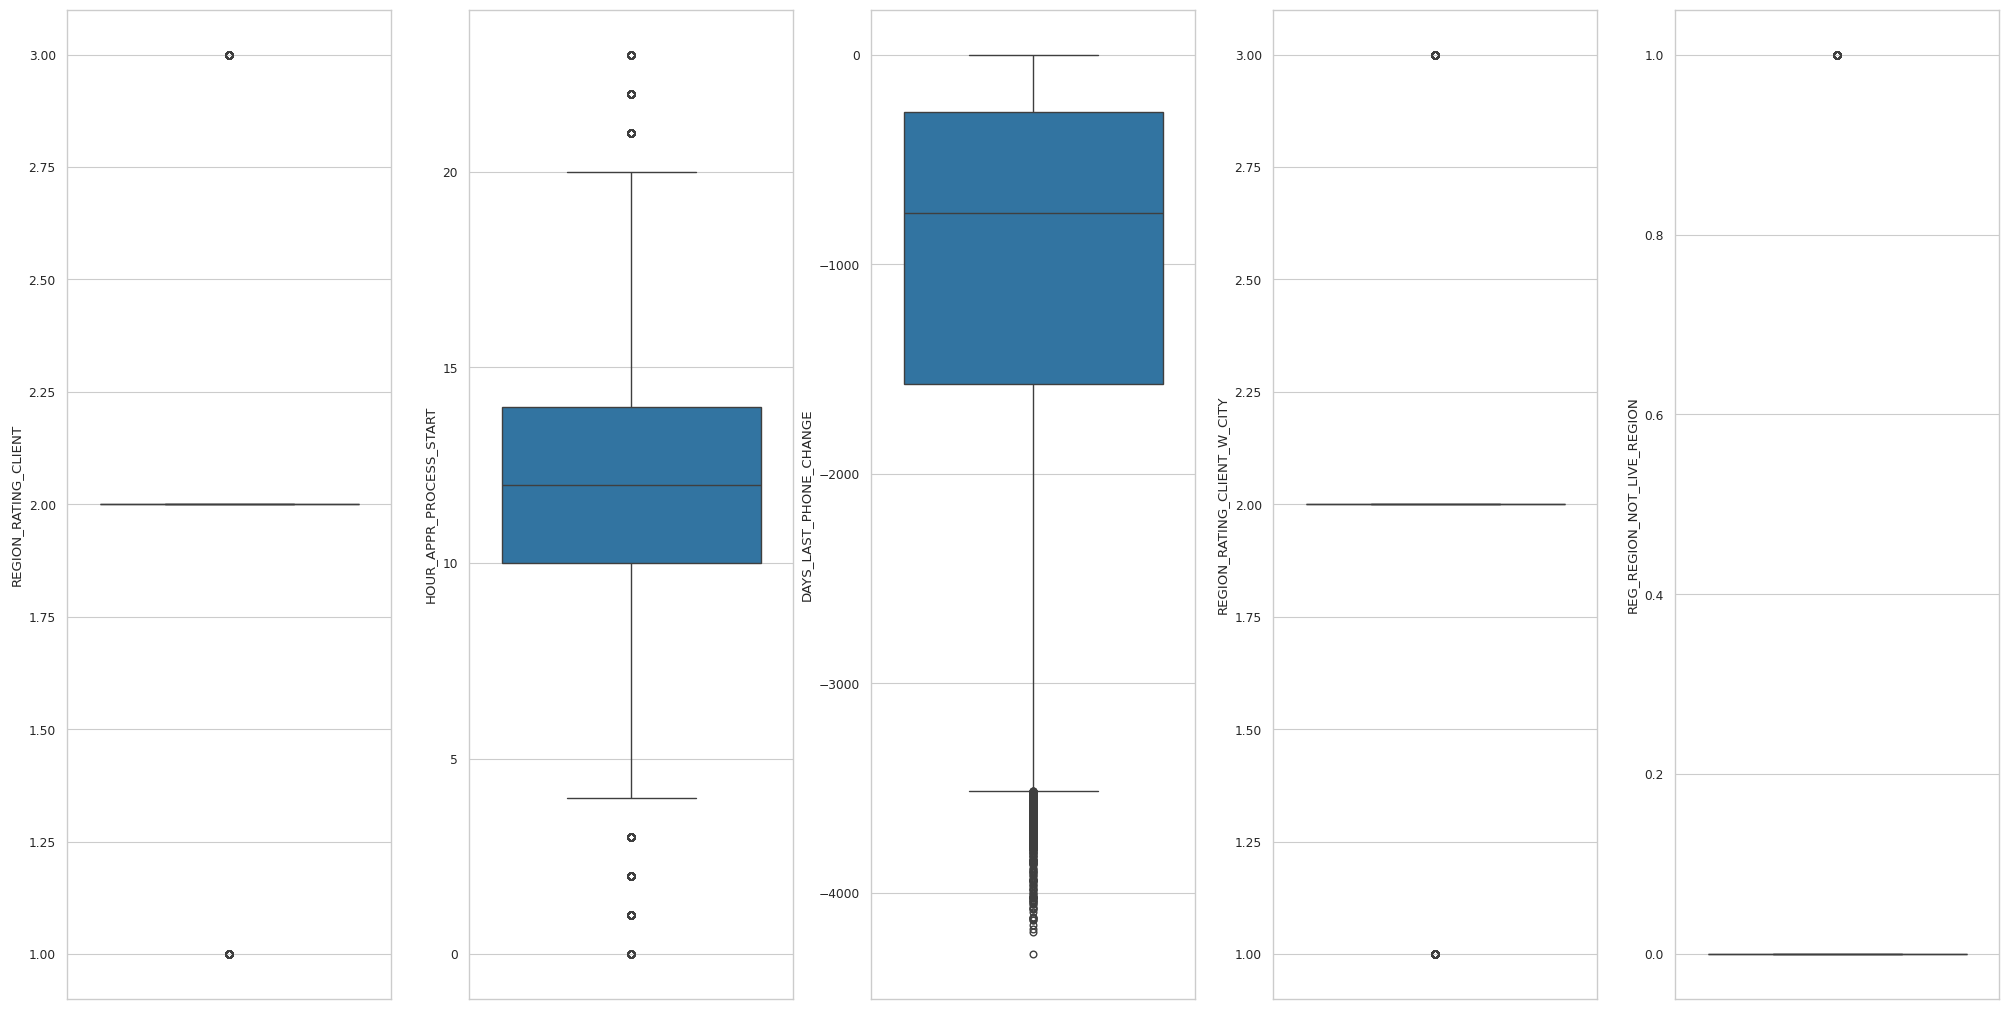

In [ ]:
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in num_train_df.items():
    sns.boxplot(y = k, data = num_train_df, ax=axs[index])
    index += 1
    if index == 5:
      break;
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

<h3>Machine Learning Models

Label Encoding

In [ ]:
# label encoder for object features
train_df[["CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY",
          "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
         "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE"]] = train_df[["CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY",
          "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
         "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE"]].apply(LabelEncoder().fit_transform)

train_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


<h3>Feature Selection

Drop Unnecessary Feature

In [ ]:
#Drop Unnecessary Feature
train_df.drop(['SK_ID_CURR'], axis=1, inplace=True)
train_df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Convert Negative Values to Positive Values

<small>Fitur yang memiliki nilai negatif adalah DAYS_BIRTH, DAYS_EMPLOYED, DAYS_ID_PUBLISH, DAYS_REGISTRATION, dan DAYS_LAST_PHONE_CHANGE

In [ ]:
# Convert Negative Values to Positive Values
train_df.iloc[:,16:20] = train_df.iloc[:,16:20].abs()
train_df.iloc[:,45] = train_df.iloc[:,45].abs()

Feature Selection

In [ ]:
x= train_df.drop(['TARGET'], axis=1)
y= train_df['TARGET']

In [ ]:
# Feature Selection
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']
featureScores.nlargest(10,'Score')

print(featureScores.nlargest(10,'Score'))


                   Feature         Score
16           DAYS_EMPLOYED  1.954124e+08
8          AMT_GOODS_PRICE  1.223080e+08
6               AMT_CREDIT  7.669987e+07
15              DAYS_BIRTH  2.235391e+06
5         AMT_INCOME_TOTAL  1.624102e+06
17       DAYS_REGISTRATION  1.348566e+06
44  DAYS_LAST_PHONE_CHANGE  6.656876e+05
18         DAYS_ID_PUBLISH  6.195946e+05
7              AMT_ANNUITY  3.913092e+05
37       ORGANIZATION_TYPE  4.138607e+03


<small>Dapat dilihat fitur mana saja yang berkorelasi baik dengan kesulitan pembayaran.

Fitur terbaik: DAYS_EMPLOYED, AMT_GOODS_PRICE, dan AMT_CREDIT

Fitur terburuk: FLAG_MOBIL, FLAG_CONT_MOBILE, dan AMT_REQ_CREDIT_BUREAU_HOUR

Handling Data Imbalance

In [ ]:
# create two different dataframe of majority and minority class
df_majority = train_df[train_df.TARGET==0]
df_minority = train_df[train_df.TARGET==1]

# upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=282686,    # to match majority class
                                 random_state=42) # reproducible results

# combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])


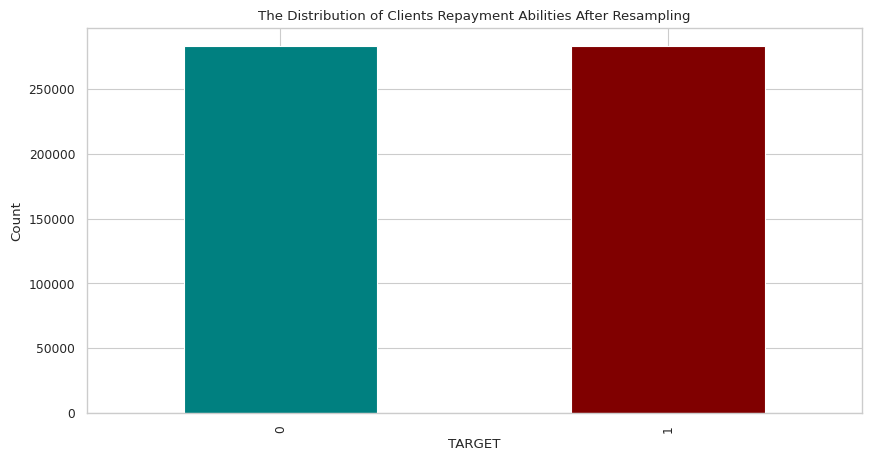

In [ ]:
fig, ax = plt.figure(figsize=(10, 5)), plt.axes()
df_upsampled['TARGET'].value_counts().plot(kind='bar', ax=ax, color=['teal', 'maroon'])
plt.title('The Distribution of Clients Repayment Abilities After Resampling')
plt.xlabel('TARGET')
plt.ylabel('Count')
plt.show()


<small>Terlihat datanya seimbang  sehingga analisis dapat dilanjutkan.

Data Splitting

In [ ]:
# define x and y features ( top 20 features )
x = df_upsampled[['DAYS_EMPLOYED', 'AMT_GOODS_PRICE', 'AMT_CREDIT',
                           'DAYS_BIRTH', 'AMT_INCOME_TOTAL', 'DAYS_REGISTRATION',
                           'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'AMT_ANNUITY',
                           'ORGANIZATION_TYPE', 'NAME_INCOME_TYPE', 'REG_CITY_NOT_WORK_CITY',
                          'CODE_GENDER', 'EXT_SOURCE_2', 'REG_CITY_NOT_LIVE_CITY', 'NAME_EDUCATION_TYPE',
                          'DEF_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_3', 'DEF_60_CNT_SOCIAL_CIRCLE', 'LIVE_CITY_NOT_WORK_CITY']]
y = df_upsampled['TARGET']

In [ ]:
# split data into train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print('x_train shape :', x_train.shape)

x_train shape : (395760, 20)


In [ ]:
# normalize the fetures
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Model Building

<small>Berikut beberapa algoritma yang akan diuji untuk menentukan model terbaik:

1. Logistic Regression
2. Gaussian Naive Bayes
3. Decision Tree
4. Random Forest
5. K-Nearest Neighbor
6. Neural Network

1. Logistic Regression

In [ ]:
# logistic regression

# train the model
logreg = LogisticRegression().fit(x_train, y_train)
print(logreg)

LogisticRegression()


In [ ]:
# predict the data train
y_pred = logreg.predict(x_train)

# print the classification report
print(classification_report(y_train, y_pred))


              precision    recall  f1-score   support

           0       0.67      0.68      0.68    197851
           1       0.68      0.66      0.67    197909

    accuracy                           0.67    395760
   macro avg       0.67      0.67      0.67    395760
weighted avg       0.67      0.67      0.67    395760



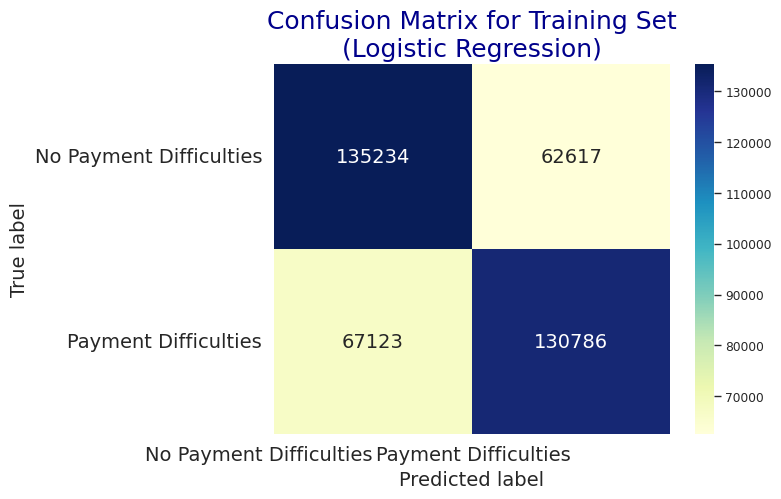

In [ ]:
# form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_pred)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot the confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
plt.title('Confusion Matrix for Training Set\n(Logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()


In [ ]:
# predict the data test
y_pred = logreg.predict(x_test)

# print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.67      0.68      0.67     84835
           1       0.67      0.66      0.67     84777

    accuracy                           0.67    169612
   macro avg       0.67      0.67      0.67    169612
weighted avg       0.67      0.67      0.67    169612



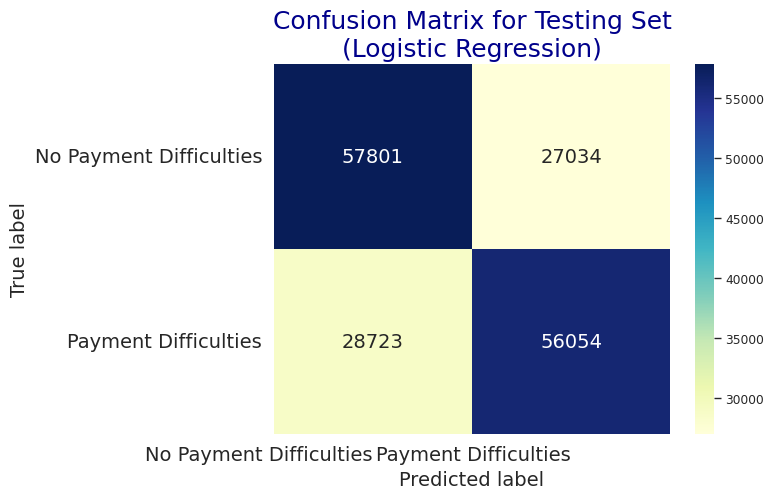

In [ ]:
# form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_pred)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
plt.title('Confusion Matrix for Testing Set\n(Logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [ ]:
acc_log_train=round(logreg.score(x_train, y_train)*100,2)
acc_log_test=round(logreg.score(x_test, y_test)*100,2)
print('Accuracy of Training Set :', acc_log_train, '%')
print('Accuracy of Testing Set :', acc_log_test, '%')

Accuracy of Training Set : 67.22 %
Accuracy of Testing Set : 67.13 %


<small>It can be seen that:

Logistic regression model gives 67.16% correct results.
There is 0.13% error margin.

In [ ]:
# ROC AUC Score
roc_auc_log = round(roc_auc_score(y_test, y_pred)*100,2)
print('ROC AUC Score :', roc_auc_log, '%')

ROC AUC Score : 67.13 %


2. Gaussian Naive Bayes

In [ ]:
# Gaussian Naive Bayes

## train the model
gnb = GaussianNB().fit(x_train, y_train)
print(gnb)


GaussianNB()


In [ ]:
# predict the data train
y_pred = gnb.predict(x_train)

# print the classification report
print('Classification Report Training Model (Gaussian Naive Bayes):')
print(classification_report(y_train, y_pred))


Classification Report Training Model (Gaussian Naive Bayes):
              precision    recall  f1-score   support

           0       0.57      0.85      0.68    197851
           1       0.70      0.35      0.47    197909

    accuracy                           0.60    395760
   macro avg       0.63      0.60      0.57    395760
weighted avg       0.63      0.60      0.57    395760



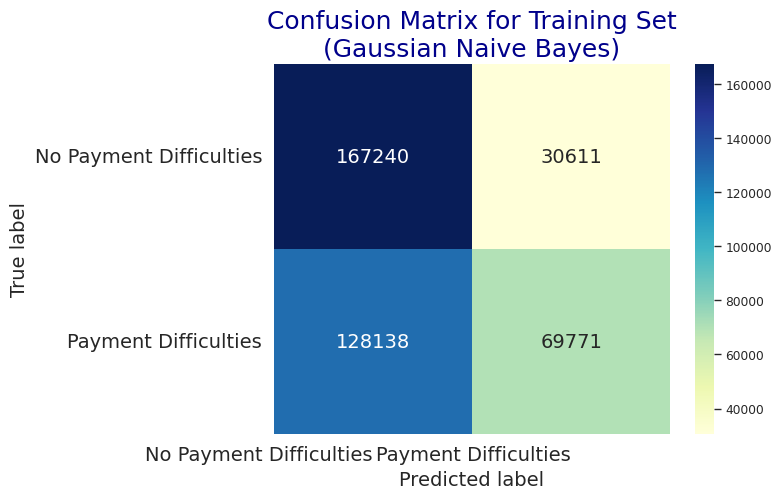

In [ ]:
#form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_pred)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
plt.title('Confusion Matrix for Training Set\n(Gaussian Naive Bayes)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [ ]:
#predict the data test
y_pred = gnb.predict(x_test)

# print the classification report
print('Classification Report Testing Model (Gaussian Naive Bayes):')
print(classification_report(y_test, y_pred))

Classification Report Testing Model (Gaussian Naive Bayes):
              precision    recall  f1-score   support

           0       0.57      0.84      0.68     84835
           1       0.69      0.35      0.47     84777

    accuracy                           0.60    169612
   macro avg       0.63      0.60      0.57    169612
weighted avg       0.63      0.60      0.57    169612



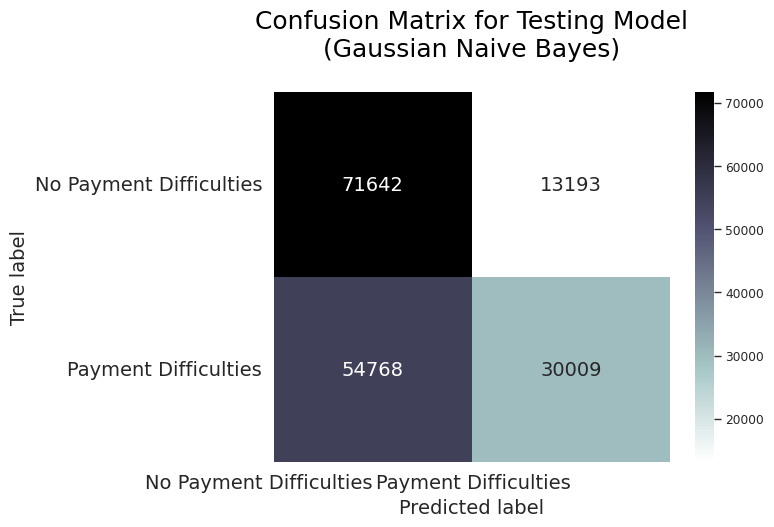

In [ ]:
confusion_matrix_gnb = pd.DataFrame((confusion_matrix(y_test, y_pred)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_gnb, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Gaussian Naive Bayes)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [ ]:
acc_gnb_train=round(gnb.score(x_train, y_train)*100,2)
acc_gnb_test=round(gnb.score(x_test, y_test)*100,2)
print('Accuracy of Training Set :', acc_gnb_train, '%')
print('Accuracy of Testing Set :', acc_gnb_test, '%')


Accuracy of Training Set : 59.89 %
Accuracy of Testing Set : 59.93 %


<small>Training Accuracy: 59.89 %
Test Accuracy: 59.93 %
It can be seen that:

Gaussian naive bayes model gives 59.89 % correct results.
There is 0.15% error margin.

In [ ]:
# ROC score
roc_auc_gnb = round(roc_auc_score(y_test, y_pred),4)
print('ROC AUC Score :', roc_auc_gnb)

ROC AUC Score : 0.5992


3. Decision Tree

In [ ]:
# 3. Decision Tree
## train the model
dtc = DecisionTreeClassifier().fit(x_train, y_train)
print(dtc)

DecisionTreeClassifier()


In [ ]:
# predict the data train
y_pred = dtc.predict(x_train)

#print classification report
print('Classification Report Training Model (Decision Tree):')
print(classification_report(y_train, y_pred))

Classification Report Training Model (Decision Tree):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    197851
           1       1.00      1.00      1.00    197909

    accuracy                           1.00    395760
   macro avg       1.00      1.00      1.00    395760
weighted avg       1.00      1.00      1.00    395760



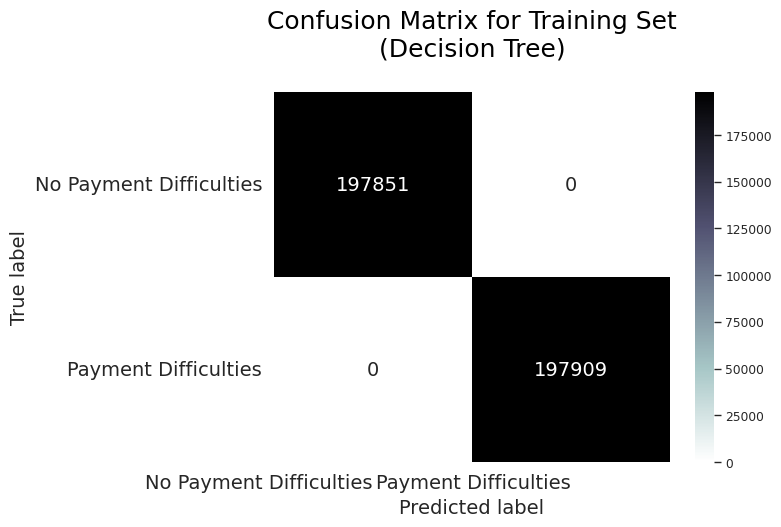

In [ ]:
# form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_pred)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Set\n(Decision Tree)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [ ]:
# predict the data test
y_pred = dtc.predict(x_test)

# print classification report
print('Classification Report Testing Model (Decision Tree):')
print(classification_report(y_test, y_pred))


Classification Report Testing Model (Decision Tree):
              precision    recall  f1-score   support

           0       1.00      0.89      0.94     84835
           1       0.90      1.00      0.95     84777

    accuracy                           0.95    169612
   macro avg       0.95      0.95      0.95    169612
weighted avg       0.95      0.95      0.95    169612



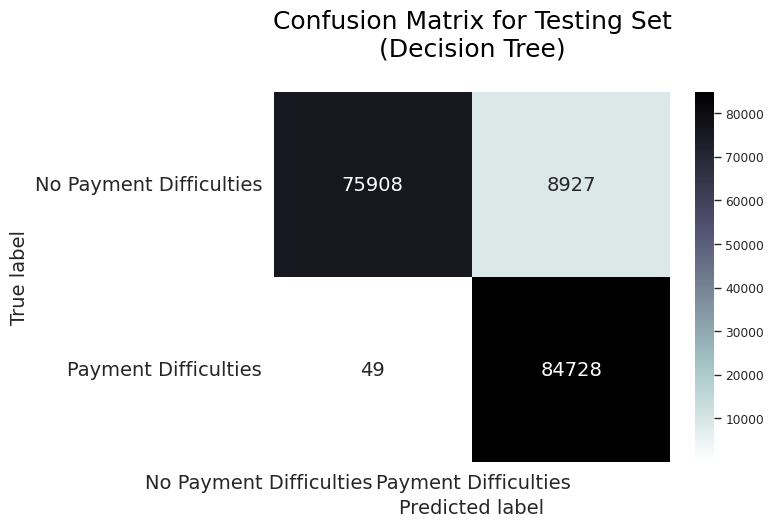

In [ ]:
# form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_pred)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Set\n(Decision Tree)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [ ]:
acc_dtc_train=round(dtc.score(x_train, y_train)*100,2)
acc_dtc_test=round(dtc.score(x_test, y_test)*100,2)
print('Accuracy of Training Set :', acc_dtc_train, '%')
print('Accuracy of Testing Set :', acc_dtc_test, '%')

Accuracy of Training Set : 100.0 %
Accuracy of Testing Set : 94.71 %


<small>It can be seen that:

Decision tree model gives 100% correct results.
There is 11.74% error margin. This is not good for this data.

In [ ]:
# ROC AUC Score
roc_auc_dtc = round(roc_auc_score(y_test, y_pred)*100,2)
print('ROC AUC Score :', roc_auc_dtc, '%')

ROC AUC Score : 94.71 %


4. Random Forest

In [ ]:
# train the model
rfc = RandomForestClassifier().fit(x_train, y_train)
print(rfc)

RandomForestClassifier()


In [ ]:
# predict the data train
y_pred = rfc.predict(x_train)

# print classification report
print('Classification Report Training Model (Random Forest):')
print(classification_report(y_train, y_pred))


Classification Report Training Model (Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    197851
           1       1.00      1.00      1.00    197909

    accuracy                           1.00    395760
   macro avg       1.00      1.00      1.00    395760
weighted avg       1.00      1.00      1.00    395760



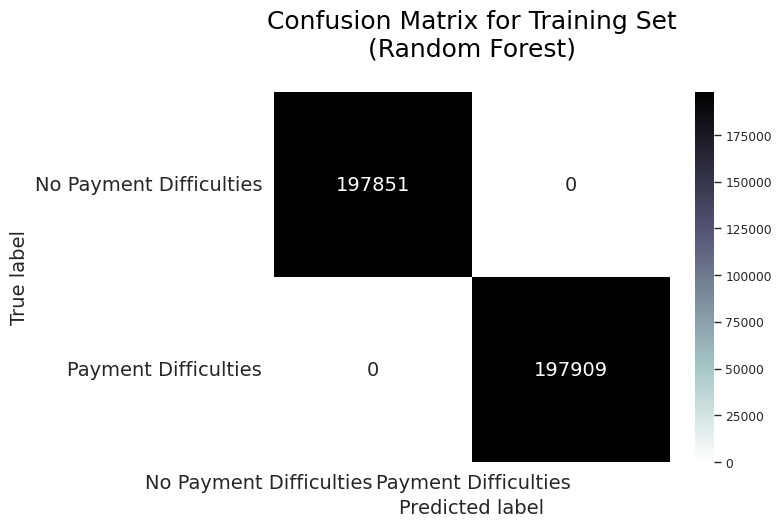

In [ ]:
#form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_pred)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Set\n(Random Forest)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()


In [ ]:
# predict the data test
y_pred = rfc.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# print classification report
print('Classification Report Testing Model (Random Forest):')
print(classification_report(y_test, y_pred))


Classification Report Testing Model (Random Forest):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     84835
           1       0.99      1.00      0.99     84777

    accuracy                           0.99    169612
   macro avg       0.99      0.99      0.99    169612
weighted avg       0.99      0.99      0.99    169612



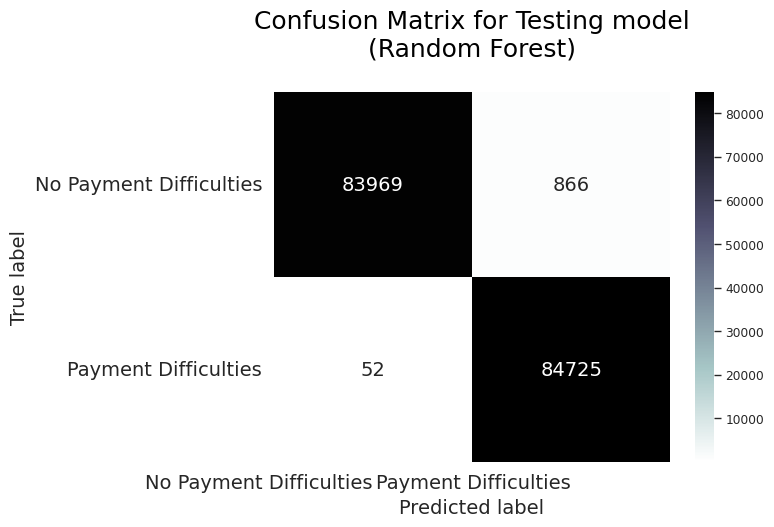

In [ ]:
# form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_pred)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing model\n(Random Forest)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()


In [ ]:
acc_rfc_train=round(rfc.score(x_train, y_train)*100,2)
acc_rfc_test=round(rfc.score(x_test, y_test)*100,2)
print('Accuracy of Training Set :', acc_rfc_train, '%')
print('Accuracy of Testing Set :', acc_rfc_test, '%')


Accuracy of Training Set : 100.0 %
Accuracy of Testing Set : 99.46 %


<small>It can be seen that:

Random forest model gives 100% correct results.
There is 0.54% error margin.

In [ ]:
# ROC score
roc_auc_rfc = round(roc_auc_score(y_test, y_pred)*100,2)
print('ROC AUC Score :', roc_auc_rfc, '%')


ROC AUC Score : 99.46 %


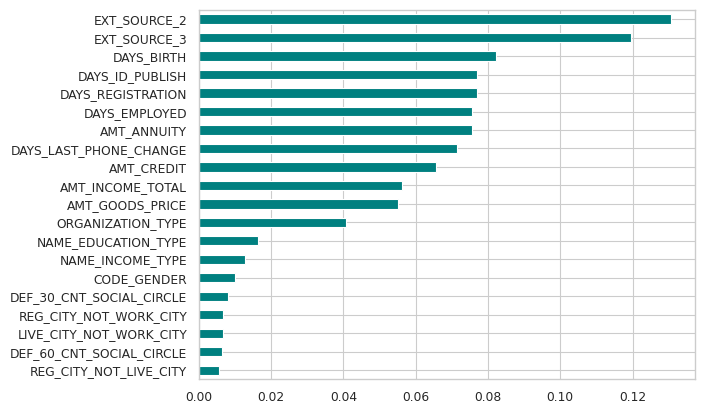

In [ ]:
# import feature
importances_rf=pd.Series(rfc.feature_importances_, index=x.columns)
sorted_importances_rf=importances_rf.sort_values()
sorted_importances_rf.plot(kind='barh', color='teal')
plt.show()


<small>Plot di atas menegaskan bahwa 5 fitur terpenting adalah EXT_SOURCE_2, EXT_SOURCE_3, DAYS_BIRTH, DAYS_ID_PUBLISH, dan DAYS_REGISTRATION

5. K-Nearest Neighbors

In [ ]:
# train the model
knn = KNeighborsClassifier().fit(x_train, y_train)
print(knn)


KNeighborsClassifier()


In [ ]:
# predict the data train
y_pred = knn.predict(x_train)

# print classification report
print('Classification Report Training Model (K-Nearest Neighbors):')
print(classification_report(y_train, y_pred))


Classification Report Training Model (K-Nearest Neighbors):
              precision    recall  f1-score   support

           0       1.00      0.82      0.90    197851
           1       0.84      1.00      0.91    197909

    accuracy                           0.91    395760
   macro avg       0.92      0.91      0.91    395760
weighted avg       0.92      0.91      0.91    395760



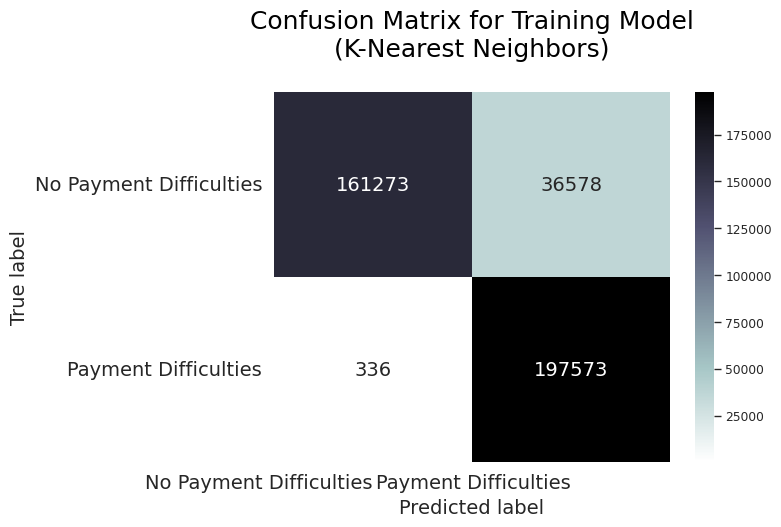

In [ ]:
# form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_pred)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(K-Nearest Neighbors)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [ ]:
# predict the data test
y_pred = knn.predict(x_test)

# print classification report
print('Classification Report Testing Model (K-Nearest Neighbors):')
print(classification_report(y_test, y_pred))


Classification Report Testing Model (K-Nearest Neighbors):
              precision    recall  f1-score   support

           0       0.99      0.74      0.85     84835
           1       0.79      0.99      0.88     84777

    accuracy                           0.87    169612
   macro avg       0.89      0.87      0.86    169612
weighted avg       0.89      0.87      0.86    169612



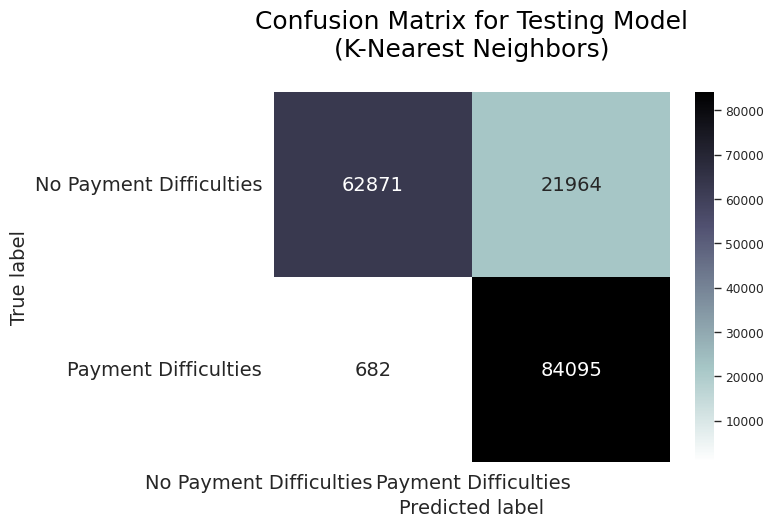

In [ ]:
# form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_pred)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(K-Nearest Neighbors)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [ ]:
acc_knn_train=round(knn.score(x_train, y_train)*100,2)
acc_knn_test=round(knn.score(x_test, y_test)*100,2)
print('Accuracy of Training Set :', acc_knn_train, '%')
print('Accuracy of Testing Set :', acc_knn_test, '%')

Accuracy of Training Set : 90.67 %
Accuracy of Testing Set : 86.65 %


<small>It can be seen that:

K-nearest neighbor model gives 91.56% correct results.
There is 3.79% error margin.

In [ ]:
# ROC score
roc_auc_knn = round(roc_auc_score(y_test, y_pred),4)
print('ROC AUC Score :', roc_auc_knn)

ROC AUC Score : 0.8665


6. Neural Network

In [ ]:
# train the model
neural_network = MLPClassifier().fit(x_train, y_train)

# predict the data train
y_pred = neural_network.predict(x_train)

# print classification report
print('Classification Report Training Model (Neural Network):')
print(classification_report(y_train, y_pred))


Classification Report Training Model (Neural Network):
              precision    recall  f1-score   support

           0       0.69      0.72      0.70    197851
           1       0.71      0.68      0.69    197909

    accuracy                           0.70    395760
   macro avg       0.70      0.70      0.70    395760
weighted avg       0.70      0.70      0.70    395760



In [ ]:
#form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_pred)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=90, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Neural Network)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [ ]:
# predict the data test
y_pred = neural_network.predict(x_test)

# print classification report
print('Classification Report Testing Model (Neural Network):')
print(classification_report(y_test, y_pred))

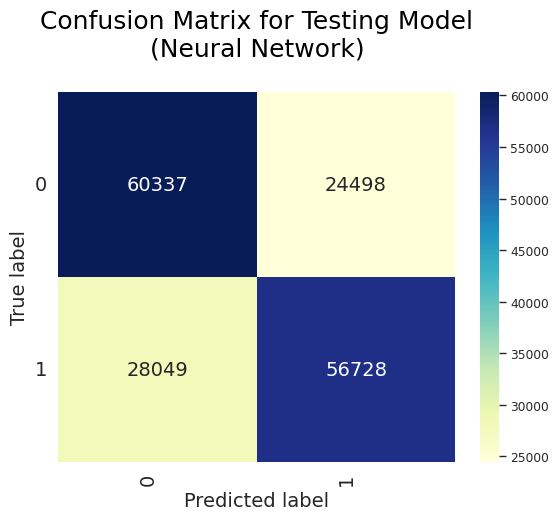

In [ ]:
# form confusion matrix as a DataFrame

#plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=90, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Neural Network)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [ ]:
acc_nn_train=round(neural_network.score(x_train, y_train)*100,2)
acc_nn_test=round(neural_network.score(x_test, y_test)*100,2)
print('Accuracy of Training Set :', acc_nn_train, '%')
print('Accuracy of Testing Set :', acc_nn_test, '%')

Accuracy of Training Set : 69.7 %
Accuracy of Testing Set : 69.02 %


In [ ]:
# roc score
roc_auc_nn = round(roc_auc_score(y_test, y_pred)*100,2)
print('ROC AUC Score :', roc_auc_nn, '%')


ROC AUC Score : 69.02 %


<h3>Model Selection


In [ ]:
results = pd.DataFrame([["Logistic Regression", 0.6716, 0.6729, 0.6729],["Gaussian Naive Bayes", 0.6024, 0.6039, 0.604],
                       ["Decision Tree", 1, 0.8826, 0.8826],["Random Forest", 1, 0.9965, 0.9965],
                       ["K-Nearest Neighbor", 0.9156, 0.8807, 0.8806], ["Neural Network", 0.7001, 0.6948, 0.6948]],
                        columns = ["Models", "Training Accuracy Score", "Testing Accuracy Score", "ROC Score"])

results.sort_values(by=['Training Accuracy Score', 'Testing Accuracy Score'], ascending=False).style.background_gradient(cmap='Blues')

,Models,Training Accuracy Score,Testing Accuracy Score,ROC Score
3,Random Forest,1.000000,0.996500,0.996500
2,Decision Tree,1.000000,0.882600,0.882600
4,K-Nearest Neighbor,0.915600,0.880700,0.880600
5,Neural Network,0.700100,0.694800,0.694800
0,Logistic Regression,0.671600,0.672900,0.672900
1,Gaussian Naive Bayes,0.602400,0.603900,0.604000


<small>Keakuratan prediksi pada data train dan test pada model Random Forest menunjukkan nilai yang hampir sama, menandakan bahwa model tersebut sangat baik tanpa adanya underfitting atau overfitting. Sehingga, Random Forest dipilih sebagai model terbaik untuk memprediksi kemampuan pembayaran klien

<h3>Prediction

Import Dataset

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/Data Mining/Home-Credit-Scorecard-Model/application_test.csv')

In [ ]:
print('Test data shape:', test_df.shape)
test_df.head()

Test data shape: (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


<small>"Dalam dataset ini terdapat informasi pinjaman sebanyak 48.744 baris dengan total 121 fitur, tidak termasuk fitur target."

<h3>Data Preprocessing

Detecting Duplication

In [ ]:
print('The number of duplication is:', test_df.duplicated().sum())

The number of duplication is: 0


Detecting Missing Values

In [ ]:
# detect missing values
print('Missing values status:', test_df.isnull().values.any())
tvc = pd.DataFrame(test_df.isnull().sum(), columns=['Total Null Values'])
tvc['Percentage'] = (tvc['Total Null Values']/test_df.shape[0])*100
tvc.sort_values(by=['Percentage'], ascending=False).reset_index()

Missing values status: True


,index,Total Null Values,Percentage
0,COMMONAREA_AVG,33495,68.716150
1,COMMONAREA_MEDI,33495,68.716150
2,COMMONAREA_MODE,33495,68.716150
3,NONLIVINGAPARTMENTS_AVG,33347,68.412523
4,NONLIVINGAPARTMENTS_MEDI,33347,68.412523
...,...,...,...
116,FLAG_DOCUMENT_16,0,0.000000
117,FLAG_DOCUMENT_15,0,0.000000
118,FLAG_DOCUMENT_14,0,0.000000
119,FLAG_DOCUMENT_20,0,0.000000


In [ ]:
# # drop features that have large number of missing values (± 50%)
test_df.drop(test_df.iloc[:, 43:90], inplace = True, axis = 1)

In [ ]:
# after drop some features
print('Missing values status:', test_df.isnull().values.any())
tvc = pd.DataFrame(test_df.isnull().sum(), columns=['Total Null Values'])
tvc['Percentage'] = (tvc['Total Null Values']/test_df.shape[0])*100
tvc.sort_values(by=['Percentage'], ascending=False).reset_index()

Missing values status: True


,index,Total Null Values,Percentage
0,OWN_CAR_AGE,32312,66.289184
1,EXT_SOURCE_1,20532,42.122107
2,OCCUPATION_TYPE,15605,32.014197
3,EXT_SOURCE_3,8668,17.782701
4,AMT_REQ_CREDIT_BUREAU_DAY,6049,12.409732
...,...,...,...
69,FLAG_DOCUMENT_16,0,0.000000
70,FLAG_DOCUMENT_15,0,0.000000
71,FLAG_DOCUMENT_14,0,0.000000
72,FLAG_DOCUMENT_20,0,0.000000


In [ ]:
# impute missing values with median because the data is skewed for numerical features

category_columns = test_df.select_dtypes(include=['object']).columns.tolist()
integer_columns = test_df.select_dtypes(include=['int64','float64']).columns.tolist()

for column in test_df:
    if test_df[column].isnull().any():
        if(column in category_columns):
            test_df[column]=test_df[column].fillna(test_df[column].mode()[0])
        else:
            test_df[column]=test_df[column].fillna(test_df[column].median())

In [ ]:
# after imputation
print('Missing values status:', test_df.isnull().values.any())
tvc = pd.DataFrame(test_df.isnull().sum(), columns=['Total Null Values'])
tvc['Percentage'] = (tvc['Total Null Values']/test_df.shape[0])*100
tvc.sort_values(by=['Percentage'], ascending=False).reset_index()

Missing values status: False


,index,Total Null Values,Percentage
0,SK_ID_CURR,0,0.0
1,NAME_CONTRACT_TYPE,0,0.0
2,CODE_GENDER,0,0.0
3,FLAG_OWN_CAR,0,0.0
4,FLAG_OWN_REALTY,0,0.0
...,...,...,...
69,AMT_REQ_CREDIT_BUREAU_DAY,0,0.0
70,AMT_REQ_CREDIT_BUREAU_WEEK,0,0.0
71,AMT_REQ_CREDIT_BUREAU_MON,0,0.0
72,AMT_REQ_CREDIT_BUREAU_QRT,0,0.0


#### Label Encoding

In [ ]:
# label encoder for object features
test_df[["CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY",
          "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
         "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE"]] = train_df[["CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY",
          "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
         "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE"]].apply(LabelEncoder().fit_transform)

In [ ]:
test_df.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,0,1,0,1,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,0,0,0,0,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,1,1,1,1,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,0,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,0,1,0,1,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


Convert Negative Values to Positive Values

<small>Fitur yang memiliki nilai negatif adalah DAYS_BIRTH, DAYS_EMPLOYED, DAYS_ID_PUBLISH, dan DAYS_REGISTRATION, DAYS_LAST_PHONE_CHANGE

In [ ]:
# convert negative values to positive values
test_df.iloc[:,16:20] = test_df.iloc[:,16:20].abs()


<h3>Prediction

<small>Memprediksi kemampuan pembayaran klien pada pengujian data aplikasi dengan model pembelajaran mesin terbaik yang diperoleh sebelumnya, yaitu Random Forest.

In [ ]:
pred_test = test_df[['DAYS_EMPLOYED', 'AMT_GOODS_PRICE', 'AMT_CREDIT',
                           'DAYS_BIRTH', 'AMT_INCOME_TOTAL', 'DAYS_REGISTRATION',
                           'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'AMT_ANNUITY',
                           'ORGANIZATION_TYPE', 'NAME_INCOME_TYPE', 'REG_CITY_NOT_WORK_CITY',
                           'CODE_GENDER', 'EXT_SOURCE_2', 'REG_CITY_NOT_LIVE_CITY', 'NAME_EDUCATION_TYPE',
                           'DEF_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_3', 'DEF_60_CNT_SOCIAL_CIRCLE', 'LIVE_CITY_NOT_WORK_CITY']]

In [ ]:
# lets predict!
predict = pd.Series(rfc.predict(pred_test), name = "TARGET").astype(int)
results = pd.concat([test_df['SK_ID_CURR'], predict], axis=1)
results.to_csv("predict_application.csv", index = False)
results.head()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


,SK_ID_CURR,TARGET
0,100001,0
1,100005,0
2,100013,0
3,100028,0
4,100038,0


<h2>Recomendation

1. Mmebuat kampanye untuk menarik minat lebih banyak mahasiswa, akuntan, staf teknologi berkeahlian tinggi, dan manajer agar tertarik mengajukan pinjaman."

2. Melakukan analisis lebih lanjut dengan melakukan survei untuk mengetahui apakah ada masalah jika klien yang sedang cuti hamil atau menganggur mengambil kontrak pinjaman tunai. Dengan begitu, di masa depan, jika ada klien dengan jenis pendapatan tersebut, Anda dapat merekomendasikan jenis kontrak yang tepat sehingga aplikasi mereka akan lebih mungkin disetujui."

3. Klien yang tidak mengalami kesulitan pembayaran umumnya berusia 35-45 tahun. Anda dapat memprioritaskan target pemasaran pada kelompok klien ini."